In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [28]:
tsr_theta_train.shape

(394, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 0.0229 - rmse: 0.1515
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 3/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 4/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 7/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 8/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 9/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 10/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 87/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 88/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 90/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 91/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 92/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 93/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1242
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 174/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1237
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1096
Epoch 250/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1094
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1094
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1099
Epoch 256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 420/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 421/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 422/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 578/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 586/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 664/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 665/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 666/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 667/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 668/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 744/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 750/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 828/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 830/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 832/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9370e-04 - rmse: 0.0315
Epoch 833/10000
10/10 

10/10 [==============================] - 0s 5ms/step - loss: 7.1065e-04 - rmse: 0.0267
Epoch 904/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3904e-04 - rmse: 0.0272
Epoch 905/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2919e-04 - rmse: 0.0270
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3969e-04 - rmse: 0.0272
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1325e-04 - rmse: 0.0267
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5654e-04 - rmse: 0.0275
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4309e-04 - rmse: 0.0273
Epoch 910/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9214e-04 - rmse: 0.0263
Epoch 911/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2674e-04 - rmse: 0.0270
Epoch 912/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5757e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 5.3041e-04 - rmse: 0.0230
Epoch 983/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0112e-04 - rmse: 0.0224
Epoch 984/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2545e-04 - rmse: 0.0229
Epoch 985/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5595e-04 - rmse: 0.0236
Epoch 986/10000
10/10 [==============================] - 0s 3ms/step - loss: 4.9987e-04 - rmse: 0.0224
Epoch 987/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1044e-04 - rmse: 0.0226
Epoch 988/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3657e-04 - rmse: 0.0232
Epoch 989/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3963e-04 - rmse: 0.0232
Epoch 990/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1868e-04 - rmse: 0.0228
Epoch 991/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8808e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 4.1778e-04 - rmse: 0.0204
Epoch 1062/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9509e-04 - rmse: 0.0199
Epoch 1063/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8968e-04 - rmse: 0.0197
Epoch 1064/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9162e-04 - rmse: 0.0198
Epoch 1065/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8068e-04 - rmse: 0.0195
Epoch 1066/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7028e-04 - rmse: 0.0192
Epoch 1067/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8113e-04 - rmse: 0.0195
Epoch 1068/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0113e-04 - rmse: 0.0200
Epoch 1069/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1853e-04 - rmse: 0.0205
Epoch 1070/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 2.9797e-04 - rmse: 0.0173
Epoch 1140/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9297e-04 - rmse: 0.0171
Epoch 1141/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9410e-04 - rmse: 0.0171
Epoch 1142/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9806e-04 - rmse: 0.0173
Epoch 1143/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3288e-04 - rmse: 0.0182
Epoch 1144/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2651e-04 - rmse: 0.0181
Epoch 1145/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0033e-04 - rmse: 0.0173
Epoch 1146/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2578e-04 - rmse: 0.0180
Epoch 1147/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1745e-04 - rmse: 0.0178
Epoch 1148/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.5653e-04 - rmse: 0.0160
Epoch 1218/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5383e-04 - rmse: 0.0159
Epoch 1219/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1459e-04 - rmse: 0.0177
Epoch 1220/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6820e-04 - rmse: 0.0164
Epoch 1221/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4956e-04 - rmse: 0.0158
Epoch 1222/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3623e-04 - rmse: 0.0154
Epoch 1223/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3632e-04 - rmse: 0.0154
Epoch 1224/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5684e-04 - rmse: 0.0160
Epoch 1225/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4912e-04 - rmse: 0.0158
Epoch 1226/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 2.0995e-04 - rmse: 0.0145
Epoch 1296/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9500e-04 - rmse: 0.0140
Epoch 1297/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8207e-04 - rmse: 0.0135
Epoch 1298/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8129e-04 - rmse: 0.0135
Epoch 1299/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8801e-04 - rmse: 0.0137
Epoch 1300/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8543e-04 - rmse: 0.0136
Epoch 1301/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8756e-04 - rmse: 0.0137
Epoch 1302/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1240e-04 - rmse: 0.0146
Epoch 1303/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0534e-04 - rmse: 0.0143
Epoch 1304/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.7700e-04 - rmse: 0.0133
Epoch 1374/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5407e-04 - rmse: 0.0124
Epoch 1375/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6234e-04 - rmse: 0.0127
Epoch 1376/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9697e-04 - rmse: 0.0140
Epoch 1377/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8483e-04 - rmse: 0.0136
Epoch 1378/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6575e-04 - rmse: 0.0129
Epoch 1379/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6220e-04 - rmse: 0.0127
Epoch 1380/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1438e-04 - rmse: 0.0146
Epoch 1381/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0262e-04 - rmse: 0.0142
Epoch 1382/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 1.5296e-04 - rmse: 0.0124
Epoch 1452/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6734e-04 - rmse: 0.0129
Epoch 1453/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5434e-04 - rmse: 0.0124
Epoch 1454/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5853e-04 - rmse: 0.0126
Epoch 1455/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9136e-04 - rmse: 0.0138
Epoch 1456/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9871e-04 - rmse: 0.0141
Epoch 1457/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8461e-04 - rmse: 0.0136
Epoch 1458/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0233e-04 - rmse: 0.0142
Epoch 1459/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1813e-04 - rmse: 0.0148
Epoch 1460/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1

10/10 [==============================] - 0s 4ms/step - loss: 1.3987e-04 - rmse: 0.0118
Epoch 1530/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4143e-04 - rmse: 0.0119
Epoch 1531/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4507e-04 - rmse: 0.0120
Epoch 1532/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4047e-04 - rmse: 0.0119
Epoch 1533/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3264e-04 - rmse: 0.0115
Epoch 1534/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.5184e-04 - rmse: 0.0123
Epoch 1535/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4141e-04 - rmse: 0.0119
Epoch 1536/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3064e-04 - rmse: 0.0114
Epoch 1537/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2071e-04 - rmse: 0.0110
Epoch 1538/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.8489e-04 - rmse: 0.0136
Epoch 1608/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2606e-04 - rmse: 0.0112
Epoch 1609/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3363e-04 - rmse: 0.0116
Epoch 1610/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2139e-04 - rmse: 0.0110
Epoch 1611/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1167e-04 - rmse: 0.0106
Epoch 1612/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0794e-04 - rmse: 0.0104
Epoch 1613/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3180e-04 - rmse: 0.0115
Epoch 1614/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1536e-04 - rmse: 0.0107
Epoch 1615/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1057e-04 - rmse: 0.0105
Epoch 1616/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.3120e-04 - rmse: 0.0115
Epoch 1686/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2529e-04 - rmse: 0.0112
Epoch 1687/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4728e-04 - rmse: 0.0121
Epoch 1688/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2787e-04 - rmse: 0.0113
Epoch 1689/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1344e-04 - rmse: 0.0107
Epoch 1690/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1105e-04 - rmse: 0.0105
Epoch 1691/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2447e-04 - rmse: 0.0112
Epoch 1692/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1955e-04 - rmse: 0.0109
Epoch 1693/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0423e-04 - rmse: 0.0102
Epoch 1694/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7

10/10 [==============================] - 0s 4ms/step - loss: 9.8803e-05 - rmse: 0.0099
Epoch 1764/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1022e-04 - rmse: 0.0105
Epoch 1765/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9908e-05 - rmse: 0.0100
Epoch 1766/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9778e-05 - rmse: 0.0100
Epoch 1767/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8149e-05 - rmse: 0.0094
Epoch 1768/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3522e-05 - rmse: 0.0091
Epoch 1769/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7537e-05 - rmse: 0.0094
Epoch 1770/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0809e-05 - rmse: 0.0095
Epoch 1771/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0673e-04 - rmse: 0.0103
Epoch 1772/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.0022e-04 - rmse: 0.0100
Epoch 1842/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0600e-05 - rmse: 0.0095
Epoch 1843/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0708e-04 - rmse: 0.0103
Epoch 1844/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8458e-05 - rmse: 0.0099
Epoch 1845/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1425e-04 - rmse: 0.0107
Epoch 1846/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2987e-04 - rmse: 0.0114
Epoch 1847/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0759e-04 - rmse: 0.0104
Epoch 1848/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0469e-04 - rmse: 0.0102
Epoch 1849/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7774e-05 - rmse: 0.0094
Epoch 1850/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7

10/10 [==============================] - 0s 4ms/step - loss: 1.0404e-04 - rmse: 0.0102
Epoch 1920/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0009e-04 - rmse: 0.0100
Epoch 1921/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9230e-05 - rmse: 0.0094
Epoch 1922/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6864e-05 - rmse: 0.0093
Epoch 1923/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0372e-04 - rmse: 0.0102
Epoch 1924/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5479e-05 - rmse: 0.0092
Epoch 1925/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4983e-05 - rmse: 0.0097
Epoch 1926/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8371e-05 - rmse: 0.0099
Epoch 1927/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2357e-05 - rmse: 0.0091
Epoch 1928/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7

10/10 [==============================] - 0s 4ms/step - loss: 9.6975e-05 - rmse: 0.0098
Epoch 1998/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7357e-05 - rmse: 0.0093
Epoch 1999/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4387e-05 - rmse: 0.0097
Epoch 2000/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0290e-04 - rmse: 0.0101
Epoch 2001/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5912e-05 - rmse: 0.0093
Epoch 2002/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2642e-04 - rmse: 0.0112
Epoch 2003/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3144e-04 - rmse: 0.0115
Epoch 2004/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0222e-04 - rmse: 0.0101
Epoch 2005/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2365e-04 - rmse: 0.0111
Epoch 2006/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 6.9193e-05 - rmse: 0.0083
Epoch 2076/10000
10/10 [==============================] - 0s 3ms/step - loss: 7.6151e-05 - rmse: 0.0087
Epoch 2077/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4231e-05 - rmse: 0.0080
Epoch 2078/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4489e-05 - rmse: 0.0080
Epoch 2079/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4042e-05 - rmse: 0.0086
Epoch 2080/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2434e-05 - rmse: 0.0096
Epoch 2081/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1981e-05 - rmse: 0.0091
Epoch 2082/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7960e-05 - rmse: 0.0094
Epoch 2083/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9312e-05 - rmse: 0.0095
Epoch 2084/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 6.4716e-05 - rmse: 0.0080
Epoch 2154/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5299e-05 - rmse: 0.0074
Epoch 2155/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2870e-05 - rmse: 0.0079
Epoch 2156/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1192e-05 - rmse: 0.0078
Epoch 2157/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2127e-05 - rmse: 0.0079
Epoch 2158/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3630e-05 - rmse: 0.0086
Epoch 2159/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3702e-05 - rmse: 0.0091
Epoch 2160/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1167e-05 - rmse: 0.0084
Epoch 2161/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7131e-05 - rmse: 0.0082
Epoch 2162/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6

10/10 [==============================] - 0s 4ms/step - loss: 8.5021e-05 - rmse: 0.0092
Epoch 2232/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5333e-05 - rmse: 0.0087
Epoch 2233/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1700e-05 - rmse: 0.0079
Epoch 2234/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8668e-05 - rmse: 0.0089
Epoch 2235/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5012e-05 - rmse: 0.0087
Epoch 2236/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8489e-05 - rmse: 0.0083
Epoch 2237/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7874e-05 - rmse: 0.0088
Epoch 2238/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0792e-05 - rmse: 0.0078
Epoch 2239/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6969e-05 - rmse: 0.0075
Epoch 2240/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 7.8492e-05 - rmse: 0.0089
Epoch 2310/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0034e-04 - rmse: 0.0100
Epoch 2311/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1780e-04 - rmse: 0.0109
Epoch 2312/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5978e-05 - rmse: 0.0093
Epoch 2313/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8060e-05 - rmse: 0.0094
Epoch 2314/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9224e-05 - rmse: 0.0100
Epoch 2315/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3474e-05 - rmse: 0.0097
Epoch 2316/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1792e-05 - rmse: 0.0096
Epoch 2317/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3167e-05 - rmse: 0.0097
Epoch 2318/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0

10/10 [==============================] - 0s 4ms/step - loss: 5.0693e-05 - rmse: 0.0071
Epoch 2388/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3370e-05 - rmse: 0.0066
Epoch 2389/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5845e-05 - rmse: 0.0075
Epoch 2390/10000
10/10 [==============================] - 0s 3ms/step - loss: 5.8930e-05 - rmse: 0.0077
Epoch 2391/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8088e-05 - rmse: 0.0069
Epoch 2392/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6847e-05 - rmse: 0.0068
Epoch 2393/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7409e-05 - rmse: 0.0069
Epoch 2394/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4264e-05 - rmse: 0.0074
Epoch 2395/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7970e-05 - rmse: 0.0076
Epoch 2396/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5

10/10 [==============================] - 0s 4ms/step - loss: 4.3209e-05 - rmse: 0.0066
Epoch 2466/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7592e-05 - rmse: 0.0069
Epoch 2467/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3311e-05 - rmse: 0.0066
Epoch 2468/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8698e-05 - rmse: 0.0070
Epoch 2469/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6603e-05 - rmse: 0.0068
Epoch 2470/10000
10/10 [==============================] - 0s 3ms/step - loss: 6.1423e-05 - rmse: 0.0078
Epoch 2471/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8840e-05 - rmse: 0.0070
Epoch 2472/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9252e-05 - rmse: 0.0070
Epoch 2473/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3822e-05 - rmse: 0.0066
Epoch 2474/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4

10/10 [==============================] - 0s 4ms/step - loss: 4.0589e-05 - rmse: 0.0064
Epoch 2544/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5249e-05 - rmse: 0.0074
Epoch 2545/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1416e-05 - rmse: 0.0078
Epoch 2546/10000
10/10 [==============================] - 0s 3ms/step - loss: 6.7524e-05 - rmse: 0.0082
Epoch 2547/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8386e-05 - rmse: 0.0083
Epoch 2548/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5977e-05 - rmse: 0.0075
Epoch 2549/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4424e-05 - rmse: 0.0074
Epoch 2550/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8878e-05 - rmse: 0.0083
Epoch 2551/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6024e-05 - rmse: 0.0093
Epoch 2552/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8

10/10 [==============================] - 0s 4ms/step - loss: 4.1977e-05 - rmse: 0.0065
Epoch 2622/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8920e-05 - rmse: 0.0062
Epoch 2623/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5922e-05 - rmse: 0.0068
Epoch 2624/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0279e-05 - rmse: 0.0063
Epoch 2625/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6313e-05 - rmse: 0.0060
Epoch 2626/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8164e-05 - rmse: 0.0062
Epoch 2627/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5113e-05 - rmse: 0.0074
Epoch 2628/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1666e-04 - rmse: 0.0108
Epoch 2629/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3197e-04 - rmse: 0.0115
Epoch 2630/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 6.1330e-05 - rmse: 0.0078
Epoch 2700/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2293e-05 - rmse: 0.0072
Epoch 2701/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3260e-05 - rmse: 0.0073
Epoch 2702/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2416e-05 - rmse: 0.0065
Epoch 2703/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0179e-05 - rmse: 0.0063
Epoch 2704/10000
10/10 [==============================] - 0s 3ms/step - loss: 6.9139e-05 - rmse: 0.0083
Epoch 2705/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3331e-05 - rmse: 0.0086
Epoch 2706/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2406e-04 - rmse: 0.0111
Epoch 2707/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2181e-04 - rmse: 0.0110
Epoch 2708/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 4.4023e-05 - rmse: 0.0066
Epoch 2778/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0152e-05 - rmse: 0.0063
Epoch 2779/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3332e-05 - rmse: 0.0058
Epoch 2780/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3428e-05 - rmse: 0.0066
Epoch 2781/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1648e-05 - rmse: 0.0065
Epoch 2782/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0597e-05 - rmse: 0.0078
Epoch 2783/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4509e-04 - rmse: 0.0120
Epoch 2784/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1038e-04 - rmse: 0.0105
Epoch 2785/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2201e-04 - rmse: 0.0110
Epoch 2786/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0

10/10 [==============================] - 0s 4ms/step - loss: 1.8138e-04 - rmse: 0.0135
Epoch 2856/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0678e-04 - rmse: 0.0103
Epoch 2857/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2460e-04 - rmse: 0.0112
Epoch 2858/10000
10/10 [==============================] - 0s 3ms/step - loss: 9.9514e-05 - rmse: 0.0100
Epoch 2859/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5572e-05 - rmse: 0.0098
Epoch 2860/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9916e-05 - rmse: 0.0095
Epoch 2861/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9384e-05 - rmse: 0.0095
Epoch 2862/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4248e-05 - rmse: 0.0086
Epoch 2863/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6216e-05 - rmse: 0.0075
Epoch 2864/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9

10/10 [==============================] - 0s 4ms/step - loss: 3.6370e-05 - rmse: 0.0060
Epoch 2934/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1584e-05 - rmse: 0.0064
Epoch 2935/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3150e-05 - rmse: 0.0058
Epoch 2936/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5650e-05 - rmse: 0.0060
Epoch 2937/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9022e-05 - rmse: 0.0062
Epoch 2938/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6660e-05 - rmse: 0.0061
Epoch 2939/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0662e-05 - rmse: 0.0064
Epoch 2940/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5553e-05 - rmse: 0.0060
Epoch 2941/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4759e-05 - rmse: 0.0059
Epoch 2942/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 3.1261e-05 - rmse: 0.0056
Epoch 3012/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1947e-05 - rmse: 0.0065
Epoch 3013/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1801e-05 - rmse: 0.0065
Epoch 3014/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8698e-05 - rmse: 0.0062
Epoch 3015/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9024e-05 - rmse: 0.0054
Epoch 3016/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2183e-05 - rmse: 0.0047
Epoch 3017/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.7964e-05 - rmse: 0.0042
Epoch 3018/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9407e-05 - rmse: 0.0044
Epoch 3019/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.2012e-05 - rmse: 0.0047
Epoch 3020/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

10/10 [==============================] - 0s 4ms/step - loss: 2.8097e-05 - rmse: 0.0053
Epoch 3090/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4215e-05 - rmse: 0.0049
Epoch 3091/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7114e-05 - rmse: 0.0052
Epoch 3092/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6572e-05 - rmse: 0.0052
Epoch 3093/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1935e-05 - rmse: 0.0047
Epoch 3094/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9613e-05 - rmse: 0.0044
Epoch 3095/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8988e-05 - rmse: 0.0044
Epoch 3096/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8057e-05 - rmse: 0.0042
Epoch 3097/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8048e-05 - rmse: 0.0042
Epoch 3098/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 2.1325e-05 - rmse: 0.0046
Epoch 3168/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3051e-05 - rmse: 0.0048
Epoch 3169/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0642e-05 - rmse: 0.0045
Epoch 3170/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9328e-05 - rmse: 0.0044
Epoch 3171/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0150e-05 - rmse: 0.0045
Epoch 3172/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9261e-05 - rmse: 0.0044
Epoch 3173/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5441e-05 - rmse: 0.0039
Epoch 3174/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6251e-05 - rmse: 0.0040
Epoch 3175/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5374e-05 - rmse: 0.0039
Epoch 3176/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 5.3645e-05 - rmse: 0.0073
Epoch 3246/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8267e-05 - rmse: 0.0062
Epoch 3247/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8975e-05 - rmse: 0.0062
Epoch 3248/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0246e-05 - rmse: 0.0055
Epoch 3249/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5697e-05 - rmse: 0.0051
Epoch 3250/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2687e-05 - rmse: 0.0048
Epoch 3251/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0319e-05 - rmse: 0.0045
Epoch 3252/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7139e-05 - rmse: 0.0041
Epoch 3253/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.5175e-05 - rmse: 0.0039
Epoch 3254/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 4ms/step - loss: 1.8876e-05 - rmse: 0.0043
Epoch 3324/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9508e-05 - rmse: 0.0044
Epoch 3325/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1596e-05 - rmse: 0.0046
Epoch 3326/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9627e-05 - rmse: 0.0044
Epoch 3327/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0310e-05 - rmse: 0.0045
Epoch 3328/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7360e-05 - rmse: 0.0042
Epoch 3329/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9665e-05 - rmse: 0.0044
Epoch 3330/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9638e-05 - rmse: 0.0063
Epoch 3331/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7450e-05 - rmse: 0.0052
Epoch 3332/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 4.2743e-05 - rmse: 0.0065
Epoch 3402/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3031e-05 - rmse: 0.0066
Epoch 3403/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2969e-05 - rmse: 0.0057
Epoch 3404/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0252e-05 - rmse: 0.0063
Epoch 3405/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5022e-05 - rmse: 0.0067
Epoch 3406/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6354e-05 - rmse: 0.0068
Epoch 3407/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3378e-05 - rmse: 0.0066
Epoch 3408/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1430e-05 - rmse: 0.0056
Epoch 3409/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6787e-05 - rmse: 0.0052
Epoch 3410/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

10/10 [==============================] - 0s 4ms/step - loss: 1.5139e-05 - rmse: 0.0039
Epoch 3480/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9387e-05 - rmse: 0.0044
Epoch 3481/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1597e-05 - rmse: 0.0046
Epoch 3482/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0952e-05 - rmse: 0.0046
Epoch 3483/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4538e-05 - rmse: 0.0050
Epoch 3484/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5026e-05 - rmse: 0.0050
Epoch 3485/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0681e-05 - rmse: 0.0045
Epoch 3486/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8313e-05 - rmse: 0.0043
Epoch 3487/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9694e-05 - rmse: 0.0044
Epoch 3488/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 1.9230e-05 - rmse: 0.0044
Epoch 3558/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3828e-05 - rmse: 0.0049
Epoch 3559/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4119e-05 - rmse: 0.0049
Epoch 3560/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4121e-05 - rmse: 0.0049
Epoch 3561/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3792e-05 - rmse: 0.0049
Epoch 3562/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8679e-05 - rmse: 0.0043
Epoch 3563/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1778e-05 - rmse: 0.0047
Epoch 3564/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7515e-05 - rmse: 0.0042
Epoch 3565/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6028e-05 - rmse: 0.0040
Epoch 3566/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 4ms/step - loss: 5.7734e-05 - rmse: 0.0076
Epoch 3636/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2610e-05 - rmse: 0.0065
Epoch 3637/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9107e-05 - rmse: 0.0063
Epoch 3638/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1279e-05 - rmse: 0.0056
Epoch 3639/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9825e-05 - rmse: 0.0055
Epoch 3640/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7735e-05 - rmse: 0.0053
Epoch 3641/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7482e-05 - rmse: 0.0052
Epoch 3642/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5491e-05 - rmse: 0.0050
Epoch 3643/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7780e-05 - rmse: 0.0042
Epoch 3644/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 2.4397e-05 - rmse: 0.0049
Epoch 3714/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8014e-05 - rmse: 0.0053
Epoch 3715/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3252e-05 - rmse: 0.0048
Epoch 3716/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4336e-05 - rmse: 0.0059
Epoch 3717/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2079e-05 - rmse: 0.0057
Epoch 3718/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9441e-05 - rmse: 0.0063
Epoch 3719/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.3659e-05 - rmse: 0.0058
Epoch 3720/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9614e-05 - rmse: 0.0054
Epoch 3721/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9784e-05 - rmse: 0.0063
Epoch 3722/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 4ms/step - loss: 2.2213e-05 - rmse: 0.0047
Epoch 3792/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1031e-05 - rmse: 0.0046
Epoch 3793/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7651e-05 - rmse: 0.0042
Epoch 3794/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8161e-05 - rmse: 0.0043
Epoch 3795/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1176e-05 - rmse: 0.0046
Epoch 3796/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1489e-05 - rmse: 0.0046
Epoch 3797/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5776e-05 - rmse: 0.0060
Epoch 3798/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5173e-05 - rmse: 0.0059
Epoch 3799/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0809e-05 - rmse: 0.0056
Epoch 3800/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8

10/10 [==============================] - 0s 4ms/step - loss: 1.6691e-05 - rmse: 0.0041
Epoch 3870/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8428e-05 - rmse: 0.0043
Epoch 3871/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0803e-05 - rmse: 0.0046
Epoch 3872/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5980e-05 - rmse: 0.0040
Epoch 3873/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4432e-05 - rmse: 0.0038
Epoch 3874/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7126e-05 - rmse: 0.0041
Epoch 3875/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5278e-05 - rmse: 0.0039
Epoch 3876/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0719e-05 - rmse: 0.0046
Epoch 3877/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4989e-05 - rmse: 0.0050
Epoch 3878/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2

10/10 [==============================] - 0s 4ms/step - loss: 3.7053e-05 - rmse: 0.0061
Epoch 3948/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1601e-05 - rmse: 0.0072
Epoch 3949/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6776e-05 - rmse: 0.0068
Epoch 3950/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9533e-05 - rmse: 0.0095
Epoch 3951/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2967e-04 - rmse: 0.0114
Epoch 3952/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0801e-05 - rmse: 0.0090
Epoch 3953/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1200e-05 - rmse: 0.0072
Epoch 3954/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8515e-05 - rmse: 0.0062
Epoch 3955/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8797e-05 - rmse: 0.0083
Epoch 3956/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8

10/10 [==============================] - 0s 4ms/step - loss: 7.1376e-05 - rmse: 0.0084
Epoch 4026/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0223e-05 - rmse: 0.0095
Epoch 4027/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0359e-04 - rmse: 0.0102
Epoch 4028/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7231e-04 - rmse: 0.0165
Epoch 4029/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6720e-04 - rmse: 0.0238
Epoch 4030/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4119e-04 - rmse: 0.0253
Epoch 4031/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2021e-04 - rmse: 0.0228
Epoch 4032/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.8334e-04 - rmse: 0.0168
Epoch 4033/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6428e-04 - rmse: 0.0128
Epoch 4034/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.2575e-05 - rmse: 0.0035
Epoch 4104/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4349e-05 - rmse: 0.0038
Epoch 4105/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6944e-05 - rmse: 0.0041
Epoch 4106/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5290e-05 - rmse: 0.0039
Epoch 4107/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3425e-05 - rmse: 0.0037
Epoch 4108/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7442e-05 - rmse: 0.0042
Epoch 4109/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8419e-05 - rmse: 0.0043
Epoch 4110/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.2165e-05 - rmse: 0.0047
Epoch 4111/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5123e-05 - rmse: 0.0039
Epoch 4112/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.5925e-05 - rmse: 0.0040
Epoch 4182/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5953e-05 - rmse: 0.0040
Epoch 4183/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8293e-05 - rmse: 0.0043
Epoch 4184/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7949e-05 - rmse: 0.0042
Epoch 4185/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5358e-05 - rmse: 0.0039
Epoch 4186/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1514e-05 - rmse: 0.0034
Epoch 4187/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1624e-05 - rmse: 0.0034
Epoch 4188/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4166e-05 - rmse: 0.0038
Epoch 4189/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7159e-05 - rmse: 0.0041
Epoch 4190/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7

10/10 [==============================] - 0s 4ms/step - loss: 2.4309e-05 - rmse: 0.0049
Epoch 4260/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9411e-05 - rmse: 0.0054
Epoch 4261/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0656e-05 - rmse: 0.0045
Epoch 4262/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8105e-05 - rmse: 0.0043
Epoch 4263/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7705e-05 - rmse: 0.0042
Epoch 4264/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7407e-05 - rmse: 0.0042
Epoch 4265/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8494e-05 - rmse: 0.0043
Epoch 4266/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6915e-05 - rmse: 0.0041
Epoch 4267/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.7457e-05 - rmse: 0.0042
Epoch 4268/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 1.1357e-05 - rmse: 0.0034
Epoch 4338/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6861e-06 - rmse: 0.0031
Epoch 4339/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3526e-06 - rmse: 0.0031
Epoch 4340/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5568e-06 - rmse: 0.0031
Epoch 4341/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1443e-05 - rmse: 0.0034
Epoch 4342/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7964e-06 - rmse: 0.0031
Epoch 4343/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0168e-05 - rmse: 0.0032
Epoch 4344/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0404e-05 - rmse: 0.0032
Epoch 4345/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4825e-05 - rmse: 0.0039
Epoch 4346/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 2.3724e-05 - rmse: 0.0049
Epoch 4416/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6780e-05 - rmse: 0.0052
Epoch 4417/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3545e-05 - rmse: 0.0058
Epoch 4418/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2527e-05 - rmse: 0.0057
Epoch 4419/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5590e-05 - rmse: 0.0060
Epoch 4420/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1395e-05 - rmse: 0.0064
Epoch 4421/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6057e-05 - rmse: 0.0060
Epoch 4422/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8775e-05 - rmse: 0.0054
Epoch 4423/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2529e-05 - rmse: 0.0047
Epoch 4424/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 1.1933e-05 - rmse: 0.0035
Epoch 4494/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3188e-05 - rmse: 0.0036
Epoch 4495/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5821e-05 - rmse: 0.0040
Epoch 4496/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6055e-05 - rmse: 0.0040
Epoch 4497/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4944e-05 - rmse: 0.0039
Epoch 4498/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4117e-05 - rmse: 0.0049
Epoch 4499/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.9373e-05 - rmse: 0.0054
Epoch 4500/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3015e-05 - rmse: 0.0048
Epoch 4501/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5292e-05 - rmse: 0.0050
Epoch 4502/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 1.7082e-05 - rmse: 0.0041
Epoch 4572/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6569e-05 - rmse: 0.0041
Epoch 4573/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5316e-05 - rmse: 0.0039
Epoch 4574/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2188e-05 - rmse: 0.0035
Epoch 4575/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0706e-05 - rmse: 0.0033
Epoch 4576/10000
10/10 [==============================] - 0s 3ms/step - loss: 9.1682e-06 - rmse: 0.0030
Epoch 4577/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0066e-05 - rmse: 0.0032
Epoch 4578/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0157e-05 - rmse: 0.0032
Epoch 4579/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2307e-06 - rmse: 0.0030
Epoch 4580/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7

10/10 [==============================] - 0s 4ms/step - loss: 2.1636e-05 - rmse: 0.0047
Epoch 4650/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1998e-05 - rmse: 0.0047
Epoch 4651/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5156e-05 - rmse: 0.0059
Epoch 4652/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4740e-05 - rmse: 0.0074
Epoch 4653/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5071e-05 - rmse: 0.0081
Epoch 4654/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3437e-05 - rmse: 0.0073
Epoch 4655/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5615e-05 - rmse: 0.0068
Epoch 4656/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4193e-05 - rmse: 0.0066
Epoch 4657/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3047e-05 - rmse: 0.0057
Epoch 4658/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 7.9425e-06 - rmse: 0.0028
Epoch 4728/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8996e-06 - rmse: 0.0030
Epoch 4729/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5023e-06 - rmse: 0.0029
Epoch 4730/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3525e-06 - rmse: 0.0029
Epoch 4731/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8165e-06 - rmse: 0.0030
Epoch 4732/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4422e-06 - rmse: 0.0029
Epoch 4733/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0457e-05 - rmse: 0.0032
Epoch 4734/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0833e-05 - rmse: 0.0033
Epoch 4735/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0509e-05 - rmse: 0.0032
Epoch 4736/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.3374e-05 - rmse: 0.0037
Epoch 4806/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4569e-05 - rmse: 0.0038
Epoch 4807/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1710e-05 - rmse: 0.0034
Epoch 4808/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0891e-05 - rmse: 0.0033
Epoch 4809/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9853e-06 - rmse: 0.0030
Epoch 4810/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7013e-06 - rmse: 0.0029
Epoch 4811/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3322e-06 - rmse: 0.0029
Epoch 4812/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2881e-06 - rmse: 0.0029
Epoch 4813/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2094e-06 - rmse: 0.0029
Epoch 4814/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4

10/10 [==============================] - 0s 4ms/step - loss: 1.0273e-05 - rmse: 0.0032
Epoch 4884/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3699e-06 - rmse: 0.0031
Epoch 4885/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8599e-06 - rmse: 0.0031
Epoch 4886/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5750e-06 - rmse: 0.0029
Epoch 4887/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0347e-06 - rmse: 0.0028
Epoch 4888/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4708e-06 - rmse: 0.0029
Epoch 4889/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4148e-06 - rmse: 0.0029
Epoch 4890/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6442e-06 - rmse: 0.0029
Epoch 4891/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8347e-06 - rmse: 0.0031
Epoch 4892/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.9700e-05 - rmse: 0.0044
Epoch 4962/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7255e-05 - rmse: 0.0042
Epoch 4963/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6023e-05 - rmse: 0.0040
Epoch 4964/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6491e-05 - rmse: 0.0041
Epoch 4965/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2154e-05 - rmse: 0.0047
Epoch 4966/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0891e-05 - rmse: 0.0046
Epoch 4967/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2024e-05 - rmse: 0.0047
Epoch 4968/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4236e-05 - rmse: 0.0067
Epoch 4969/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1286e-05 - rmse: 0.0072
Epoch 4970/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 3.7316e-05 - rmse: 0.0061
Epoch 5040/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.3428e-05 - rmse: 0.0048
Epoch 5041/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2312e-05 - rmse: 0.0047
Epoch 5042/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3865e-05 - rmse: 0.0058
Epoch 5043/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0211e-05 - rmse: 0.0071
Epoch 5044/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7268e-05 - rmse: 0.0052
Epoch 5045/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4152e-05 - rmse: 0.0049
Epoch 5046/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9360e-05 - rmse: 0.0054
Epoch 5047/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4949e-05 - rmse: 0.0050
Epoch 5048/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.4

10/10 [==============================] - 0s 4ms/step - loss: 2.9867e-05 - rmse: 0.0055
Epoch 5118/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1123e-05 - rmse: 0.0056
Epoch 5119/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3394e-05 - rmse: 0.0058
Epoch 5120/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6653e-05 - rmse: 0.0082
Epoch 5121/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3423e-05 - rmse: 0.0080
Epoch 5122/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7468e-05 - rmse: 0.0082
Epoch 5123/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6690e-05 - rmse: 0.0068
Epoch 5124/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3046e-05 - rmse: 0.0073
Epoch 5125/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3211e-05 - rmse: 0.0066
Epoch 5126/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 7.5702e-05 - rmse: 0.0087
Epoch 5196/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2966e-05 - rmse: 0.0096
Epoch 5197/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5263e-05 - rmse: 0.0087
Epoch 5198/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3782e-05 - rmse: 0.0086
Epoch 5199/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7229e-05 - rmse: 0.0099
Epoch 5200/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4868e-05 - rmse: 0.0081
Epoch 5201/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1822e-05 - rmse: 0.0072
Epoch 5202/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9561e-05 - rmse: 0.0063
Epoch 5203/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7374e-05 - rmse: 0.0052
Epoch 5204/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 9.4943e-06 - rmse: 0.0031
Epoch 5274/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4849e-06 - rmse: 0.0031
Epoch 5275/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4041e-06 - rmse: 0.0031
Epoch 5276/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1818e-06 - rmse: 0.0030
Epoch 5277/10000
10/10 [==============================] - 0s 3ms/step - loss: 9.6138e-06 - rmse: 0.0031
Epoch 5278/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1207e-05 - rmse: 0.0033
Epoch 5279/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0429e-05 - rmse: 0.0032
Epoch 5280/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0548e-05 - rmse: 0.0032
Epoch 5281/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1868e-05 - rmse: 0.0034
Epoch 5282/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 8.1260e-06 - rmse: 0.0029
Epoch 5352/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4918e-06 - rmse: 0.0027
Epoch 5353/10000
10/10 [==============================] - 0s 3ms/step - loss: 6.5264e-06 - rmse: 0.0026
Epoch 5354/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7656e-06 - rmse: 0.0026
Epoch 5355/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0691e-06 - rmse: 0.0027
Epoch 5356/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3823e-06 - rmse: 0.0027
Epoch 5357/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4040e-06 - rmse: 0.0027
Epoch 5358/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7263e-06 - rmse: 0.0028
Epoch 5359/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4331e-06 - rmse: 0.0027
Epoch 5360/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6

10/10 [==============================] - 0s 4ms/step - loss: 3.1315e-05 - rmse: 0.0056
Epoch 5430/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8947e-05 - rmse: 0.0077
Epoch 5431/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2877e-05 - rmse: 0.0073
Epoch 5432/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5684e-05 - rmse: 0.0081
Epoch 5433/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8085e-05 - rmse: 0.0069
Epoch 5434/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9192e-05 - rmse: 0.0063
Epoch 5435/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5518e-05 - rmse: 0.0051
Epoch 5436/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2305e-05 - rmse: 0.0047
Epoch 5437/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5187e-05 - rmse: 0.0039
Epoch 5438/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 2.0817e-05 - rmse: 0.0046
Epoch 5508/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5459e-05 - rmse: 0.0039
Epoch 5509/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.7612e-05 - rmse: 0.0042
Epoch 5510/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6921e-05 - rmse: 0.0041
Epoch 5511/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3552e-05 - rmse: 0.0037
Epoch 5512/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1975e-05 - rmse: 0.0035
Epoch 5513/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6274e-06 - rmse: 0.0029
Epoch 5514/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5589e-06 - rmse: 0.0031
Epoch 5515/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6335e-06 - rmse: 0.0029
Epoch 5516/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0

10/10 [==============================] - 0s 4ms/step - loss: 1.4889e-05 - rmse: 0.0039
Epoch 5586/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4659e-05 - rmse: 0.0038
Epoch 5587/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2695e-05 - rmse: 0.0036
Epoch 5588/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4987e-05 - rmse: 0.0039
Epoch 5589/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6365e-05 - rmse: 0.0040
Epoch 5590/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8391e-05 - rmse: 0.0043
Epoch 5591/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0296e-05 - rmse: 0.0045
Epoch 5592/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6109e-05 - rmse: 0.0040
Epoch 5593/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0994e-05 - rmse: 0.0033
Epoch 5594/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8

10/10 [==============================] - 0s 4ms/step - loss: 5.8308e-06 - rmse: 0.0024
Epoch 5664/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7119e-06 - rmse: 0.0024
Epoch 5665/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4785e-06 - rmse: 0.0023
Epoch 5666/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1506e-06 - rmse: 0.0023
Epoch 5667/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4613e-06 - rmse: 0.0023
Epoch 5668/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4160e-06 - rmse: 0.0023
Epoch 5669/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7589e-06 - rmse: 0.0024
Epoch 5670/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2145e-06 - rmse: 0.0023
Epoch 5671/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6542e-06 - rmse: 0.0024
Epoch 5672/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1

10/10 [==============================] - 0s 4ms/step - loss: 5.7457e-06 - rmse: 0.0024
Epoch 5742/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5687e-06 - rmse: 0.0024
Epoch 5743/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2271e-06 - rmse: 0.0027
Epoch 5744/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8908e-06 - rmse: 0.0026
Epoch 5745/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9550e-06 - rmse: 0.0026
Epoch 5746/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7003e-06 - rmse: 0.0026
Epoch 5747/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3987e-06 - rmse: 0.0027
Epoch 5748/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2293e-06 - rmse: 0.0029
Epoch 5749/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8264e-06 - rmse: 0.0030
Epoch 5750/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8

10/10 [==============================] - 0s 4ms/step - loss: 6.0332e-05 - rmse: 0.0078
Epoch 5820/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1439e-05 - rmse: 0.0085
Epoch 5821/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7775e-05 - rmse: 0.0076
Epoch 5822/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5913e-05 - rmse: 0.0081
Epoch 5823/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4732e-05 - rmse: 0.0080
Epoch 5824/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5809e-05 - rmse: 0.0075
Epoch 5825/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1364e-05 - rmse: 0.0084
Epoch 5826/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3093e-05 - rmse: 0.0079
Epoch 5827/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9674e-05 - rmse: 0.0070
Epoch 5828/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 5.6954e-05 - rmse: 0.0075
Epoch 5898/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9794e-05 - rmse: 0.0071
Epoch 5899/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8836e-05 - rmse: 0.0070
Epoch 5900/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4753e-05 - rmse: 0.0067
Epoch 5901/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7367e-05 - rmse: 0.0082
Epoch 5902/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8798e-05 - rmse: 0.0077
Epoch 5903/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6533e-05 - rmse: 0.0075
Epoch 5904/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2295e-05 - rmse: 0.0072
Epoch 5905/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6159e-05 - rmse: 0.0068
Epoch 5906/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 5.8300e-06 - rmse: 0.0024
Epoch 5976/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1516e-06 - rmse: 0.0025
Epoch 5977/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9296e-06 - rmse: 0.0026
Epoch 5978/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2613e-06 - rmse: 0.0030
Epoch 5979/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4112e-06 - rmse: 0.0029
Epoch 5980/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0652e-05 - rmse: 0.0033
Epoch 5981/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1849e-05 - rmse: 0.0034
Epoch 5982/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6192e-05 - rmse: 0.0040
Epoch 5983/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4796e-05 - rmse: 0.0038
Epoch 5984/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 1.2750e-05 - rmse: 0.0036
Epoch 6054/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1675e-05 - rmse: 0.0034
Epoch 6055/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1549e-05 - rmse: 0.0034
Epoch 6056/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0529e-05 - rmse: 0.0032
Epoch 6057/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2801e-05 - rmse: 0.0036
Epoch 6058/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2756e-05 - rmse: 0.0036
Epoch 6059/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1314e-05 - rmse: 0.0034
Epoch 6060/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1039e-05 - rmse: 0.0033
Epoch 6061/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1780e-05 - rmse: 0.0034
Epoch 6062/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 1.0155e-05 - rmse: 0.0032
Epoch 6132/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3597e-06 - rmse: 0.0029
Epoch 6133/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0128e-06 - rmse: 0.0028
Epoch 6134/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0551e-05 - rmse: 0.0032
Epoch 6135/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0922e-05 - rmse: 0.0033
Epoch 6136/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3225e-05 - rmse: 0.0036
Epoch 6137/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3054e-05 - rmse: 0.0048
Epoch 6138/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2398e-05 - rmse: 0.0047
Epoch 6139/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5675e-05 - rmse: 0.0040
Epoch 6140/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4

10/10 [==============================] - 0s 4ms/step - loss: 1.6673e-05 - rmse: 0.0041
Epoch 6210/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6893e-05 - rmse: 0.0041
Epoch 6211/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6116e-05 - rmse: 0.0040
Epoch 6212/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9801e-05 - rmse: 0.0044
Epoch 6213/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8638e-05 - rmse: 0.0043
Epoch 6214/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3363e-05 - rmse: 0.0048
Epoch 6215/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9952e-05 - rmse: 0.0045
Epoch 6216/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8608e-05 - rmse: 0.0043
Epoch 6217/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5993e-05 - rmse: 0.0075
Epoch 6218/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1

10/10 [==============================] - 0s 4ms/step - loss: 7.3931e-06 - rmse: 0.0027
Epoch 6288/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1883e-05 - rmse: 0.0034
Epoch 6289/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1714e-05 - rmse: 0.0034
Epoch 6290/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5675e-06 - rmse: 0.0031
Epoch 6291/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0010e-05 - rmse: 0.0032
Epoch 6292/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0999e-05 - rmse: 0.0033
Epoch 6293/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5606e-06 - rmse: 0.0031
Epoch 6294/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0349e-05 - rmse: 0.0032
Epoch 6295/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4594e-05 - rmse: 0.0038
Epoch 6296/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 8.3423e-06 - rmse: 0.0029
Epoch 6366/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5815e-06 - rmse: 0.0028
Epoch 6367/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1955e-06 - rmse: 0.0029
Epoch 6368/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0209e-05 - rmse: 0.0032
Epoch 6369/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6756e-06 - rmse: 0.0031
Epoch 6370/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6837e-06 - rmse: 0.0029
Epoch 6371/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2194e-06 - rmse: 0.0029
Epoch 6372/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6257e-06 - rmse: 0.0029
Epoch 6373/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3479e-06 - rmse: 0.0029
Epoch 6374/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0

10/10 [==============================] - 0s 4ms/step - loss: 1.5059e-05 - rmse: 0.0039
Epoch 6444/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0850e-05 - rmse: 0.0033
Epoch 6445/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9137e-06 - rmse: 0.0030
Epoch 6446/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7640e-06 - rmse: 0.0028
Epoch 6447/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3041e-06 - rmse: 0.0027
Epoch 6448/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7309e-06 - rmse: 0.0030
Epoch 6449/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8432e-06 - rmse: 0.0031
Epoch 6450/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1467e-05 - rmse: 0.0034
Epoch 6451/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0400e-05 - rmse: 0.0032
Epoch 6452/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5

10/10 [==============================] - 0s 4ms/step - loss: 1.9750e-04 - rmse: 0.0141
Epoch 6522/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2203e-04 - rmse: 0.0110
Epoch 6523/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2320e-05 - rmse: 0.0096
Epoch 6524/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4043e-05 - rmse: 0.0092
Epoch 6525/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8878e-05 - rmse: 0.0099
Epoch 6526/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7059e-05 - rmse: 0.0076
Epoch 6527/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5015e-05 - rmse: 0.0059
Epoch 6528/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2829e-05 - rmse: 0.0048
Epoch 6529/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7669e-05 - rmse: 0.0042
Epoch 6530/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 1.9512e-05 - rmse: 0.0044
Epoch 6600/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.8522e-05 - rmse: 0.0053
Epoch 6601/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3704e-05 - rmse: 0.0049
Epoch 6602/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6522e-05 - rmse: 0.0051
Epoch 6603/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8676e-05 - rmse: 0.0054
Epoch 6604/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7536e-05 - rmse: 0.0042
Epoch 6605/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.3926e-05 - rmse: 0.0037
Epoch 6606/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2636e-05 - rmse: 0.0036
Epoch 6607/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1901e-05 - rmse: 0.0034
Epoch 6608/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 3.4167e-05 - rmse: 0.0058
Epoch 6678/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7991e-05 - rmse: 0.0042
Epoch 6679/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2595e-05 - rmse: 0.0035
Epoch 6680/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0914e-06 - rmse: 0.0030
Epoch 6681/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5811e-06 - rmse: 0.0031
Epoch 6682/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.1760e-05 - rmse: 0.0034
Epoch 6683/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8758e-05 - rmse: 0.0043
Epoch 6684/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5425e-05 - rmse: 0.0039
Epoch 6685/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4479e-05 - rmse: 0.0038
Epoch 6686/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 4ms/step - loss: 9.8296e-06 - rmse: 0.0031
Epoch 6756/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4887e-06 - rmse: 0.0031
Epoch 6757/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1324e-05 - rmse: 0.0034
Epoch 6758/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5467e-05 - rmse: 0.0039
Epoch 6759/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5126e-05 - rmse: 0.0059
Epoch 6760/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3515e-05 - rmse: 0.0048
Epoch 6761/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3097e-05 - rmse: 0.0048
Epoch 6762/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3454e-05 - rmse: 0.0048
Epoch 6763/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6252e-05 - rmse: 0.0051
Epoch 6764/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3

10/10 [==============================] - 0s 4ms/step - loss: 2.2992e-05 - rmse: 0.0048
Epoch 6834/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8781e-05 - rmse: 0.0043
Epoch 6835/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4827e-05 - rmse: 0.0039
Epoch 6836/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4112e-05 - rmse: 0.0038
Epoch 6837/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3324e-05 - rmse: 0.0037
Epoch 6838/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0331e-05 - rmse: 0.0032
Epoch 6839/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0875e-05 - rmse: 0.0033
Epoch 6840/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0292e-05 - rmse: 0.0032
Epoch 6841/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6105e-05 - rmse: 0.0040
Epoch 6842/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 2.1031e-05 - rmse: 0.0046
Epoch 6912/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8311e-05 - rmse: 0.0043
Epoch 6913/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8073e-05 - rmse: 0.0043
Epoch 6914/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5978e-05 - rmse: 0.0040
Epoch 6915/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5915e-05 - rmse: 0.0040
Epoch 6916/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0030e-05 - rmse: 0.0045
Epoch 6917/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.3052e-05 - rmse: 0.0048
Epoch 6918/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3426e-05 - rmse: 0.0048
Epoch 6919/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5542e-05 - rmse: 0.0039
Epoch 6920/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 4.7088e-05 - rmse: 0.0069
Epoch 6990/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8497e-05 - rmse: 0.0089
Epoch 6991/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7838e-05 - rmse: 0.0069
Epoch 6992/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0704e-05 - rmse: 0.0064
Epoch 6993/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1599e-05 - rmse: 0.0064
Epoch 6994/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7596e-05 - rmse: 0.0069
Epoch 6995/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6342e-05 - rmse: 0.0060
Epoch 6996/10000
10/10 [==============================] - 0s 3ms/step - loss: 2.9480e-05 - rmse: 0.0054
Epoch 6997/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4912e-05 - rmse: 0.0059
Epoch 6998/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9

10/10 [==============================] - 0s 4ms/step - loss: 2.0225e-05 - rmse: 0.0045
Epoch 7068/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7575e-05 - rmse: 0.0042
Epoch 7069/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4612e-05 - rmse: 0.0038
Epoch 7070/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3097e-05 - rmse: 0.0036
Epoch 7071/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0275e-05 - rmse: 0.0032
Epoch 7072/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0731e-05 - rmse: 0.0033
Epoch 7073/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2331e-05 - rmse: 0.0035
Epoch 7074/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1876e-05 - rmse: 0.0034
Epoch 7075/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5086e-05 - rmse: 0.0039
Epoch 7076/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 7.9065e-06 - rmse: 0.0028
Epoch 7146/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7862e-06 - rmse: 0.0028
Epoch 7147/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0464e-06 - rmse: 0.0030
Epoch 7148/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4346e-06 - rmse: 0.0029
Epoch 7149/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8190e-06 - rmse: 0.0031
Epoch 7150/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8316e-06 - rmse: 0.0030
Epoch 7151/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3901e-06 - rmse: 0.0029
Epoch 7152/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0861e-05 - rmse: 0.0033
Epoch 7153/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8341e-05 - rmse: 0.0043
Epoch 7154/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 1.9651e-05 - rmse: 0.0044
Epoch 7224/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1150e-05 - rmse: 0.0046
Epoch 7225/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4810e-05 - rmse: 0.0038
Epoch 7226/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2022e-05 - rmse: 0.0035
Epoch 7227/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6527e-06 - rmse: 0.0031
Epoch 7228/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4973e-06 - rmse: 0.0031
Epoch 7229/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2360e-06 - rmse: 0.0030
Epoch 7230/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1767e-05 - rmse: 0.0034
Epoch 7231/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1839e-05 - rmse: 0.0034
Epoch 7232/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9

10/10 [==============================] - 0s 4ms/step - loss: 3.6636e-06 - rmse: 0.0019
Epoch 7302/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2248e-06 - rmse: 0.0021
Epoch 7303/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5567e-06 - rmse: 0.0026
Epoch 7304/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4345e-06 - rmse: 0.0025
Epoch 7305/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8346e-06 - rmse: 0.0026
Epoch 7306/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3291e-06 - rmse: 0.0027
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1000e-06 - rmse: 0.0027
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3931e-06 - rmse: 0.0023
Epoch 7309/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4390e-06 - rmse: 0.0025
Epoch 7310/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 4ms/step - loss: 3.2440e-05 - rmse: 0.0057
Epoch 7380/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9662e-05 - rmse: 0.0054
Epoch 7381/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8376e-05 - rmse: 0.0043
Epoch 7382/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0933e-05 - rmse: 0.0046
Epoch 7383/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7664e-05 - rmse: 0.0042
Epoch 7384/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7570e-05 - rmse: 0.0042
Epoch 7385/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4607e-05 - rmse: 0.0038
Epoch 7386/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5070e-05 - rmse: 0.0039
Epoch 7387/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2462e-05 - rmse: 0.0035
Epoch 7388/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 7.9270e-06 - rmse: 0.0028
Epoch 7458/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2424e-06 - rmse: 0.0027
Epoch 7459/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3257e-05 - rmse: 0.0036
Epoch 7460/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0724e-05 - rmse: 0.0033
Epoch 7461/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9789e-06 - rmse: 0.0030
Epoch 7462/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8624e-06 - rmse: 0.0028
Epoch 7463/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9898e-06 - rmse: 0.0030
Epoch 7464/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5868e-06 - rmse: 0.0029
Epoch 7465/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5700e-06 - rmse: 0.0031
Epoch 7466/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1

10/10 [==============================] - 0s 4ms/step - loss: 3.9422e-06 - rmse: 0.0020
Epoch 7536/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1551e-06 - rmse: 0.0023
Epoch 7537/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4536e-06 - rmse: 0.0023
Epoch 7538/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2624e-06 - rmse: 0.0025
Epoch 7539/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3959e-06 - rmse: 0.0025
Epoch 7540/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2572e-06 - rmse: 0.0030
Epoch 7541/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3591e-06 - rmse: 0.0027
Epoch 7542/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5055e-06 - rmse: 0.0027
Epoch 7543/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6614e-06 - rmse: 0.0028
Epoch 7544/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.8990e-06 - rmse: 0.0030
Epoch 7614/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1334e-05 - rmse: 0.0034
Epoch 7615/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4410e-05 - rmse: 0.0038
Epoch 7616/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9185e-05 - rmse: 0.0044
Epoch 7617/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8939e-05 - rmse: 0.0044
Epoch 7618/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9010e-05 - rmse: 0.0044
Epoch 7619/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4839e-05 - rmse: 0.0039
Epoch 7620/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1130e-05 - rmse: 0.0033
Epoch 7621/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0904e-06 - rmse: 0.0030
Epoch 7622/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0

10/10 [==============================] - 0s 4ms/step - loss: 4.3135e-06 - rmse: 0.0021
Epoch 7692/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2534e-06 - rmse: 0.0021
Epoch 7693/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8679e-06 - rmse: 0.0022
Epoch 7694/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4704e-06 - rmse: 0.0023
Epoch 7695/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7236e-06 - rmse: 0.0022
Epoch 7696/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2795e-06 - rmse: 0.0023
Epoch 7697/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1106e-06 - rmse: 0.0023
Epoch 7698/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2475e-06 - rmse: 0.0023
Epoch 7699/10000
10/10 [==============================] - 0s 3ms/step - loss: 5.6085e-06 - rmse: 0.0024
Epoch 7700/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1073e-05 - rmse: 0.0033
Epoch 7770/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4990e-05 - rmse: 0.0039
Epoch 7771/10000
10/10 [==============================] - 0s 3ms/step - loss: 4.1777e-05 - rmse: 0.0065
Epoch 7772/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2513e-05 - rmse: 0.0065
Epoch 7773/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3783e-05 - rmse: 0.0066
Epoch 7774/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7399e-05 - rmse: 0.0061
Epoch 7775/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9478e-05 - rmse: 0.0054
Epoch 7776/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3375e-05 - rmse: 0.0058
Epoch 7777/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5437e-05 - rmse: 0.0074
Epoch 7778/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 6.4578e-06 - rmse: 0.0025
Epoch 7848/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0765e-06 - rmse: 0.0030
Epoch 7849/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1072e-06 - rmse: 0.0030
Epoch 7850/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9422e-06 - rmse: 0.0026
Epoch 7851/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0369e-06 - rmse: 0.0027
Epoch 7852/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1022e-06 - rmse: 0.0025
Epoch 7853/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8886e-06 - rmse: 0.0024
Epoch 7854/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5103e-06 - rmse: 0.0021
Epoch 7855/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4252e-06 - rmse: 0.0023
Epoch 7856/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9

10/10 [==============================] - 0s 4ms/step - loss: 4.0160e-06 - rmse: 0.0020
Epoch 7926/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5109e-06 - rmse: 0.0021
Epoch 7927/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2524e-06 - rmse: 0.0021
Epoch 7928/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7348e-06 - rmse: 0.0024
Epoch 7929/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3695e-06 - rmse: 0.0025
Epoch 7930/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6017e-06 - rmse: 0.0026
Epoch 7931/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6519e-06 - rmse: 0.0026
Epoch 7932/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3597e-06 - rmse: 0.0023
Epoch 7933/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6811e-06 - rmse: 0.0026
Epoch 7934/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.5199e-05 - rmse: 0.0039
Epoch 8004/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4176e-05 - rmse: 0.0038
Epoch 8005/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2458e-05 - rmse: 0.0035
Epoch 8006/10000
10/10 [==============================] - 0s 3ms/step - loss: 1.2331e-05 - rmse: 0.0035
Epoch 8007/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0144e-05 - rmse: 0.0032
Epoch 8008/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4191e-06 - rmse: 0.0029
Epoch 8009/10000
10/10 [==============================] - 0s 3ms/step - loss: 9.9896e-06 - rmse: 0.0032
Epoch 8010/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1442e-05 - rmse: 0.0034
Epoch 8011/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0469e-05 - rmse: 0.0032
Epoch 8012/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 9.3016e-06 - rmse: 0.0030
Epoch 8082/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1113e-06 - rmse: 0.0028
Epoch 8083/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0327e-05 - rmse: 0.0032
Epoch 8084/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0447e-05 - rmse: 0.0032
Epoch 8085/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2053e-06 - rmse: 0.0030
Epoch 8086/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1547e-06 - rmse: 0.0030
Epoch 8087/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9384e-06 - rmse: 0.0030
Epoch 8088/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2700e-06 - rmse: 0.0029
Epoch 8089/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3043e-06 - rmse: 0.0029
Epoch 8090/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2

10/10 [==============================] - 0s 3ms/step - loss: 5.4627e-06 - rmse: 0.0023
Epoch 8160/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9891e-06 - rmse: 0.0022
Epoch 8161/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0100e-06 - rmse: 0.0022
Epoch 8162/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1346e-06 - rmse: 0.0023
Epoch 8163/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2844e-06 - rmse: 0.0023
Epoch 8164/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0992e-06 - rmse: 0.0025
Epoch 8165/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4923e-06 - rmse: 0.0025
Epoch 8166/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1265e-06 - rmse: 0.0023
Epoch 8167/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1400e-06 - rmse: 0.0020
Epoch 8168/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 1.5698e-05 - rmse: 0.0040
Epoch 8238/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4449e-05 - rmse: 0.0038
Epoch 8239/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7562e-05 - rmse: 0.0042
Epoch 8240/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5783e-05 - rmse: 0.0040
Epoch 8241/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2778e-05 - rmse: 0.0036
Epoch 8242/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2078e-05 - rmse: 0.0035
Epoch 8243/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9450e-06 - rmse: 0.0032
Epoch 8244/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5490e-06 - rmse: 0.0031
Epoch 8245/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0184e-06 - rmse: 0.0030
Epoch 8246/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 3.4274e-06 - rmse: 0.0019
Epoch 8316/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3799e-06 - rmse: 0.0018
Epoch 8317/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1487e-06 - rmse: 0.0020
Epoch 8318/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3661e-06 - rmse: 0.0023
Epoch 8319/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5776e-06 - rmse: 0.0026
Epoch 8320/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8818e-06 - rmse: 0.0024
Epoch 8321/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3182e-06 - rmse: 0.0025
Epoch 8322/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1093e-06 - rmse: 0.0025
Epoch 8323/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8224e-06 - rmse: 0.0024
Epoch 8324/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2

10/10 [==============================] - 0s 4ms/step - loss: 3.2196e-05 - rmse: 0.0057
Epoch 8394/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3192e-05 - rmse: 0.0048
Epoch 8395/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4679e-05 - rmse: 0.0050
Epoch 8396/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9839e-05 - rmse: 0.0055
Epoch 8397/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1543e-05 - rmse: 0.0046
Epoch 8398/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0097e-05 - rmse: 0.0045
Epoch 8399/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6593e-05 - rmse: 0.0041
Epoch 8400/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3246e-05 - rmse: 0.0036
Epoch 8401/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4936e-05 - rmse: 0.0039
Epoch 8402/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 8.3901e-06 - rmse: 0.0029
Epoch 8472/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2730e-06 - rmse: 0.0029
Epoch 8473/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2665e-06 - rmse: 0.0030
Epoch 8474/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1211e-05 - rmse: 0.0033
Epoch 8475/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9307e-05 - rmse: 0.0044
Epoch 8476/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2706e-05 - rmse: 0.0048
Epoch 8477/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3996e-05 - rmse: 0.0066
Epoch 8478/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7376e-05 - rmse: 0.0088
Epoch 8479/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2446e-05 - rmse: 0.0085
Epoch 8480/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 4ms/step - loss: 2.8178e-05 - rmse: 0.0053
Epoch 8550/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4790e-05 - rmse: 0.0059
Epoch 8551/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0665e-05 - rmse: 0.0055
Epoch 8552/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0097e-05 - rmse: 0.0055
Epoch 8553/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9796e-05 - rmse: 0.0055
Epoch 8554/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2983e-05 - rmse: 0.0048
Epoch 8555/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9098e-05 - rmse: 0.0044
Epoch 8556/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8298e-05 - rmse: 0.0043
Epoch 8557/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7123e-05 - rmse: 0.0041
Epoch 8558/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 3.8800e-05 - rmse: 0.0062
Epoch 8628/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0057e-05 - rmse: 0.0055
Epoch 8629/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9067e-05 - rmse: 0.0054
Epoch 8630/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0453e-05 - rmse: 0.0055
Epoch 8631/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7518e-05 - rmse: 0.0061
Epoch 8632/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2348e-05 - rmse: 0.0085
Epoch 8633/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6842e-04 - rmse: 0.0130
Epoch 8634/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4147e-04 - rmse: 0.0119
Epoch 8635/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6168e-04 - rmse: 0.0127
Epoch 8636/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 4.2120e-06 - rmse: 0.0021
Epoch 8706/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3164e-06 - rmse: 0.0018
Epoch 8707/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1141e-06 - rmse: 0.0018
Epoch 8708/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0962e-06 - rmse: 0.0020
Epoch 8709/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0694e-06 - rmse: 0.0027
Epoch 8710/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1916e-06 - rmse: 0.0027
Epoch 8711/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6589e-06 - rmse: 0.0028
Epoch 8712/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9025e-06 - rmse: 0.0031
Epoch 8713/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0571e-06 - rmse: 0.0030
Epoch 8714/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5

10/10 [==============================] - 0s 4ms/step - loss: 1.8145e-05 - rmse: 0.0043
Epoch 8784/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3249e-05 - rmse: 0.0048
Epoch 8785/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5143e-05 - rmse: 0.0050
Epoch 8786/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0132e-05 - rmse: 0.0045
Epoch 8787/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3822e-05 - rmse: 0.0037
Epoch 8788/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1095e-05 - rmse: 0.0033
Epoch 8789/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3531e-06 - rmse: 0.0029
Epoch 8790/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9983e-06 - rmse: 0.0030
Epoch 8791/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1731e-06 - rmse: 0.0027
Epoch 8792/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1

10/10 [==============================] - 0s 4ms/step - loss: 3.4452e-06 - rmse: 0.0019
Epoch 8862/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.4863e-06 - rmse: 0.0019
Epoch 8863/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1963e-06 - rmse: 0.0018
Epoch 8864/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5832e-06 - rmse: 0.0019
Epoch 8865/10000
10/10 [==============================] - 0s 3ms/step - loss: 4.0886e-06 - rmse: 0.0020
Epoch 8866/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1110e-06 - rmse: 0.0020
Epoch 8867/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3532e-06 - rmse: 0.0023
Epoch 8868/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5950e-06 - rmse: 0.0024
Epoch 8869/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5638e-06 - rmse: 0.0024
Epoch 8870/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 7.9423e-06 - rmse: 0.0028
Epoch 8940/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3873e-06 - rmse: 0.0031
Epoch 8941/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4957e-06 - rmse: 0.0029
Epoch 8942/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0451e-05 - rmse: 0.0032
Epoch 8943/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2342e-06 - rmse: 0.0027
Epoch 8944/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7213e-06 - rmse: 0.0028
Epoch 8945/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5546e-06 - rmse: 0.0027
Epoch 8946/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7146e-06 - rmse: 0.0028
Epoch 8947/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6298e-06 - rmse: 0.0028
Epoch 8948/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7

10/10 [==============================] - 0s 4ms/step - loss: 6.0407e-06 - rmse: 0.0025
Epoch 9018/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8017e-06 - rmse: 0.0024
Epoch 9019/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6352e-06 - rmse: 0.0031
Epoch 9020/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3418e-05 - rmse: 0.0037
Epoch 9021/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3565e-05 - rmse: 0.0037
Epoch 9022/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2915e-05 - rmse: 0.0036
Epoch 9023/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1490e-05 - rmse: 0.0034
Epoch 9024/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2354e-05 - rmse: 0.0035
Epoch 9025/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0003e-05 - rmse: 0.0032
Epoch 9026/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 1.1352e-05 - rmse: 0.0034
Epoch 9096/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3196e-06 - rmse: 0.0031
Epoch 9097/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3641e-05 - rmse: 0.0037
Epoch 9098/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2525e-05 - rmse: 0.0035
Epoch 9099/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6643e-05 - rmse: 0.0041
Epoch 9100/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6730e-05 - rmse: 0.0041
Epoch 9101/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0034e-05 - rmse: 0.0045
Epoch 9102/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8861e-05 - rmse: 0.0043
Epoch 9103/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5311e-05 - rmse: 0.0039
Epoch 9104/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1

10/10 [==============================] - 0s 4ms/step - loss: 4.2214e-06 - rmse: 0.0021
Epoch 9174/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1678e-06 - rmse: 0.0020
Epoch 9175/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1761e-06 - rmse: 0.0020
Epoch 9176/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1212e-06 - rmse: 0.0020
Epoch 9177/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2706e-06 - rmse: 0.0021
Epoch 9178/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8617e-06 - rmse: 0.0020
Epoch 9179/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4746e-06 - rmse: 0.0019
Epoch 9180/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7275e-06 - rmse: 0.0019
Epoch 9181/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7722e-06 - rmse: 0.0019
Epoch 9182/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4

10/10 [==============================] - 0s 4ms/step - loss: 2.5100e-06 - rmse: 0.0016
Epoch 9252/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5589e-06 - rmse: 0.0016
Epoch 9253/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6835e-06 - rmse: 0.0016
Epoch 9254/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0205e-06 - rmse: 0.0017
Epoch 9255/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2298e-06 - rmse: 0.0018
Epoch 9256/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2405e-06 - rmse: 0.0018
Epoch 9257/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2913e-06 - rmse: 0.0018
Epoch 9258/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4005e-06 - rmse: 0.0018
Epoch 9259/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8289e-06 - rmse: 0.0017
Epoch 9260/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 2.3165e-05 - rmse: 0.0048
Epoch 9330/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9347e-05 - rmse: 0.0044
Epoch 9331/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4199e-05 - rmse: 0.0038
Epoch 9332/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0866e-05 - rmse: 0.0033
Epoch 9333/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1778e-05 - rmse: 0.0034
Epoch 9334/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2842e-05 - rmse: 0.0036
Epoch 9335/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0783e-05 - rmse: 0.0033
Epoch 9336/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3952e-05 - rmse: 0.0037
Epoch 9337/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4489e-05 - rmse: 0.0038
Epoch 9338/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 8.4354e-06 - rmse: 0.0029
Epoch 9408/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9160e-06 - rmse: 0.0028
Epoch 9409/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3577e-06 - rmse: 0.0027
Epoch 9410/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1336e-05 - rmse: 0.0034
Epoch 9411/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0933e-06 - rmse: 0.0030
Epoch 9412/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1264e-06 - rmse: 0.0025
Epoch 9413/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2765e-06 - rmse: 0.0027
Epoch 9414/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6755e-06 - rmse: 0.0026
Epoch 9415/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7083e-06 - rmse: 0.0024
Epoch 9416/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1

10/10 [==============================] - 0s 4ms/step - loss: 2.7848e-06 - rmse: 0.0017
Epoch 9486/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1686e-06 - rmse: 0.0018
Epoch 9487/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1234e-06 - rmse: 0.0018
Epoch 9488/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9452e-06 - rmse: 0.0020
Epoch 9489/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7097e-06 - rmse: 0.0024
Epoch 9490/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0720e-06 - rmse: 0.0025
Epoch 9491/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0366e-06 - rmse: 0.0022
Epoch 9492/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3400e-06 - rmse: 0.0021
Epoch 9493/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6936e-06 - rmse: 0.0019
Epoch 9494/10000
10/10 [==============================] - 0s 3ms/step - loss: 3.4

10/10 [==============================] - 0s 4ms/step - loss: 4.9025e-06 - rmse: 0.0022
Epoch 9564/10000
10/10 [==============================] - 0s 3ms/step - loss: 5.0701e-06 - rmse: 0.0023
Epoch 9565/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5467e-06 - rmse: 0.0024
Epoch 9566/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5265e-06 - rmse: 0.0024
Epoch 9567/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7153e-06 - rmse: 0.0022
Epoch 9568/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1395e-06 - rmse: 0.0020
Epoch 9569/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7432e-06 - rmse: 0.0022
Epoch 9570/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7927e-06 - rmse: 0.0022
Epoch 9571/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5119e-06 - rmse: 0.0021
Epoch 9572/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5

10/10 [==============================] - 0s 4ms/step - loss: 3.8289e-05 - rmse: 0.0062
Epoch 9642/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3492e-05 - rmse: 0.0058
Epoch 9643/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4420e-05 - rmse: 0.0049
Epoch 9644/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8038e-05 - rmse: 0.0042
Epoch 9645/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5841e-05 - rmse: 0.0040
Epoch 9646/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7868e-05 - rmse: 0.0042
Epoch 9647/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8101e-05 - rmse: 0.0043
Epoch 9648/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8057e-05 - rmse: 0.0053
Epoch 9649/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1547e-05 - rmse: 0.0056
Epoch 9650/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 4ms/step - loss: 1.0925e-04 - rmse: 0.0105
Epoch 9720/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1642e-04 - rmse: 0.0108
Epoch 9721/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3858e-05 - rmse: 0.0097
Epoch 9722/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3340e-05 - rmse: 0.0086
Epoch 9723/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1119e-05 - rmse: 0.0071
Epoch 9724/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5545e-05 - rmse: 0.0060
Epoch 9725/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0162e-05 - rmse: 0.0055
Epoch 9726/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3313e-05 - rmse: 0.0048
Epoch 9727/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7803e-05 - rmse: 0.0042
Epoch 9728/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2551e-05 - rmse: 0.0035
Epoch 9798/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0268e-05 - rmse: 0.0032
Epoch 9799/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7630e-06 - rmse: 0.0028
Epoch 9800/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5750e-06 - rmse: 0.0024
Epoch 9801/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7412e-06 - rmse: 0.0022
Epoch 9802/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2730e-06 - rmse: 0.0023
Epoch 9803/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7859e-06 - rmse: 0.0022
Epoch 9804/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0074e-06 - rmse: 0.0020
Epoch 9805/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6672e-06 - rmse: 0.0019
Epoch 9806/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 1.0286e-04 - rmse: 0.0101
Epoch 9876/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4583e-05 - rmse: 0.0092
Epoch 9877/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6569e-05 - rmse: 0.0075
Epoch 9878/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9853e-05 - rmse: 0.0071
Epoch 9879/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7661e-05 - rmse: 0.0061
Epoch 9880/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5269e-05 - rmse: 0.0059
Epoch 9881/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7394e-05 - rmse: 0.0076
Epoch 9882/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4965e-05 - rmse: 0.0067
Epoch 9883/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0910e-05 - rmse: 0.0056
Epoch 9884/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 9.9654e-06 - rmse: 0.0032
Epoch 9954/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9020e-06 - rmse: 0.0031
Epoch 9955/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0928e-05 - rmse: 0.0033
Epoch 9956/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0738e-05 - rmse: 0.0033
Epoch 9957/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1167e-06 - rmse: 0.0030
Epoch 9958/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4188e-06 - rmse: 0.0027
Epoch 9959/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9906e-06 - rmse: 0.0024
Epoch 9960/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1838e-06 - rmse: 0.0025
Epoch 9961/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8861e-06 - rmse: 0.0028
Epoch 9962/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:06:41.002515


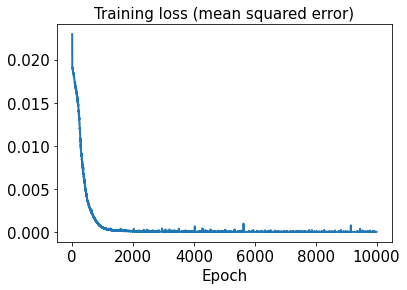

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

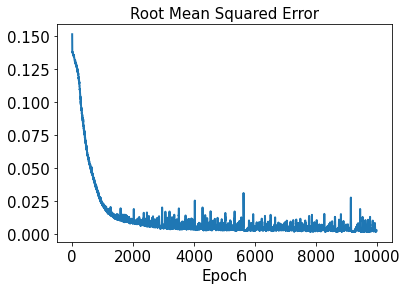

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.00033730795


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.004773008


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

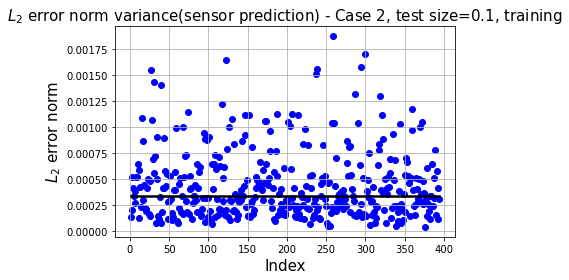

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

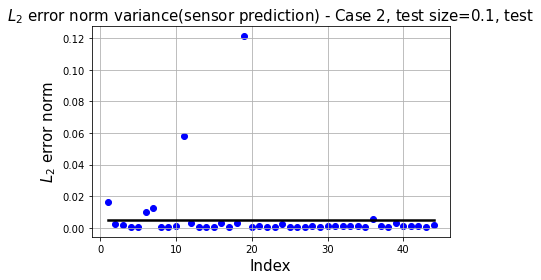

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
13/13 [==============================] - 1s 18ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 3/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1012
Epoch 4/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0961
Epoch 5/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 6/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 7/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 8/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0820
Epoch 9/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 10/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0771
Epoch 11/10000
13/13 [======

13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 85/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 86/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 87/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 88/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 89/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0291
Epoch 90/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8948e-04 - rmse: 0.0287
Epoch 91/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.7494e-04 - rmse: 0.0285
Epoch 92/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5259e-04 - rmse: 0.0281
Epoch 93/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.3405e-04 - rmse: 0.0277
Epoch 94/10000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 3.7309e-04 - rmse: 0.0145
Epoch 165/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7032e-04 - rmse: 0.0144
Epoch 166/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6687e-04 - rmse: 0.0143
Epoch 167/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6447e-04 - rmse: 0.0142
Epoch 168/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6017e-04 - rmse: 0.0140
Epoch 169/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5778e-04 - rmse: 0.0140
Epoch 170/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5576e-04 - rmse: 0.0139
Epoch 171/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5373e-04 - rmse: 0.0138
Epoch 172/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5248e-04 - rmse: 0.0138
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4905e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 2.4337e-04 - rmse: 0.0093
Epoch 244/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4252e-04 - rmse: 0.0093
Epoch 245/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4147e-04 - rmse: 0.0092
Epoch 246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4083e-04 - rmse: 0.0092
Epoch 247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4079e-04 - rmse: 0.0092
Epoch 248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4044e-04 - rmse: 0.0092
Epoch 249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3879e-04 - rmse: 0.0091
Epoch 250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3842e-04 - rmse: 0.0091
Epoch 251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3819e-04 - rmse: 0.0091
Epoch 252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3717e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.9540e-04 - rmse: 0.0069
Epoch 323/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9476e-04 - rmse: 0.0069
Epoch 324/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9446e-04 - rmse: 0.0069
Epoch 325/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9403e-04 - rmse: 0.0069
Epoch 326/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9425e-04 - rmse: 0.0069
Epoch 327/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9403e-04 - rmse: 0.0069
Epoch 328/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9328e-04 - rmse: 0.0068
Epoch 329/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9232e-04 - rmse: 0.0068
Epoch 330/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9200e-04 - rmse: 0.0068
Epoch 331/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9195e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.6768e-04 - rmse: 0.0055
Epoch 402/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6745e-04 - rmse: 0.0055
Epoch 403/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6681e-04 - rmse: 0.0055
Epoch 404/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6638e-04 - rmse: 0.0055
Epoch 405/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6638e-04 - rmse: 0.0055
Epoch 406/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6654e-04 - rmse: 0.0055
Epoch 407/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6587e-04 - rmse: 0.0055
Epoch 408/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6565e-04 - rmse: 0.0054
Epoch 409/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6519e-04 - rmse: 0.0054
Epoch 410/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6473e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.4755e-04 - rmse: 0.0046
Epoch 481/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4741e-04 - rmse: 0.0046
Epoch 482/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4689e-04 - rmse: 0.0046
Epoch 483/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4649e-04 - rmse: 0.0046
Epoch 484/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4645e-04 - rmse: 0.0046
Epoch 485/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4630e-04 - rmse: 0.0046
Epoch 486/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4623e-04 - rmse: 0.0046
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4655e-04 - rmse: 0.0046
Epoch 488/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4616e-04 - rmse: 0.0046
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4596e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.3191e-04 - rmse: 0.0040
Epoch 560/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3185e-04 - rmse: 0.0040
Epoch 561/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3195e-04 - rmse: 0.0041
Epoch 562/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3169e-04 - rmse: 0.0041
Epoch 563/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3166e-04 - rmse: 0.0041
Epoch 564/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3248e-04 - rmse: 0.0042
Epoch 565/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3224e-04 - rmse: 0.0042
Epoch 566/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3136e-04 - rmse: 0.0041
Epoch 567/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3092e-04 - rmse: 0.0040
Epoch 568/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3091e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.1929e-04 - rmse: 0.0036
Epoch 639/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1907e-04 - rmse: 0.0036
Epoch 640/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1892e-04 - rmse: 0.0036
Epoch 641/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1885e-04 - rmse: 0.0036
Epoch 642/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1876e-04 - rmse: 0.0036
Epoch 643/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1885e-04 - rmse: 0.0037
Epoch 644/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1864e-04 - rmse: 0.0036
Epoch 645/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1826e-04 - rmse: 0.0036
Epoch 646/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1845e-04 - rmse: 0.0037
Epoch 647/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1831e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.0880e-04 - rmse: 0.0034
Epoch 718/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0867e-04 - rmse: 0.0034
Epoch 719/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0837e-04 - rmse: 0.0033
Epoch 720/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0875e-04 - rmse: 0.0034
Epoch 721/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0849e-04 - rmse: 0.0034
Epoch 722/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0811e-04 - rmse: 0.0033
Epoch 723/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0800e-04 - rmse: 0.0033
Epoch 724/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0801e-04 - rmse: 0.0034
Epoch 725/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0775e-04 - rmse: 0.0033
Epoch 726/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0770e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 9.9790e-05 - rmse: 0.0032
Epoch 797/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9975e-05 - rmse: 0.0032
Epoch 798/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9669e-05 - rmse: 0.0032
Epoch 799/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9491e-05 - rmse: 0.0032
Epoch 800/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9283e-05 - rmse: 0.0031
Epoch 801/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9359e-05 - rmse: 0.0032
Epoch 802/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9015e-05 - rmse: 0.0031
Epoch 803/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8919e-05 - rmse: 0.0031
Epoch 804/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9141e-05 - rmse: 0.0032
Epoch 805/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8827e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 9.1913e-05 - rmse: 0.0030
Epoch 876/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1602e-05 - rmse: 0.0030
Epoch 877/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1655e-05 - rmse: 0.0030
Epoch 878/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1462e-05 - rmse: 0.0030
Epoch 879/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1246e-05 - rmse: 0.0029
Epoch 880/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1271e-05 - rmse: 0.0030
Epoch 881/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1178e-05 - rmse: 0.0030
Epoch 882/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1406e-05 - rmse: 0.0030
Epoch 883/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1782e-05 - rmse: 0.0031
Epoch 884/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1418e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.5043e-05 - rmse: 0.0029
Epoch 955/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5128e-05 - rmse: 0.0029
Epoch 956/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5061e-05 - rmse: 0.0029
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4888e-05 - rmse: 0.0029
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4621e-05 - rmse: 0.0028
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4651e-05 - rmse: 0.0029
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4496e-05 - rmse: 0.0028
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4454e-05 - rmse: 0.0028
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4441e-05 - rmse: 0.0029
Epoch 963/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4353e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 7.9062e-05 - rmse: 0.0027
Epoch 1034/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9062e-05 - rmse: 0.0028
Epoch 1035/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9178e-05 - rmse: 0.0028
Epoch 1036/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9149e-05 - rmse: 0.0028
Epoch 1037/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8887e-05 - rmse: 0.0028
Epoch 1038/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9066e-05 - rmse: 0.0028
Epoch 1039/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9011e-05 - rmse: 0.0028
Epoch 1040/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8746e-05 - rmse: 0.0028
Epoch 1041/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8798e-05 - rmse: 0.0028
Epoch 1042/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8

13/13 [==============================] - 0s 5ms/step - loss: 7.4030e-05 - rmse: 0.0027
Epoch 1112/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4210e-05 - rmse: 0.0027
Epoch 1113/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4102e-05 - rmse: 0.0027
Epoch 1114/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3822e-05 - rmse: 0.0027
Epoch 1115/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3539e-05 - rmse: 0.0026
Epoch 1116/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3480e-05 - rmse: 0.0026
Epoch 1117/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3342e-05 - rmse: 0.0026
Epoch 1118/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3495e-05 - rmse: 0.0026
Epoch 1119/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3509e-05 - rmse: 0.0027
Epoch 1120/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3

13/13 [==============================] - 0s 5ms/step - loss: 6.9383e-05 - rmse: 0.0026
Epoch 1190/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9163e-05 - rmse: 0.0025
Epoch 1191/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9170e-05 - rmse: 0.0025
Epoch 1192/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9092e-05 - rmse: 0.0025
Epoch 1193/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9086e-05 - rmse: 0.0025
Epoch 1194/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9116e-05 - rmse: 0.0025
Epoch 1195/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9385e-05 - rmse: 0.0026
Epoch 1196/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9557e-05 - rmse: 0.0027
Epoch 1197/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9373e-05 - rmse: 0.0026
Epoch 1198/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9

13/13 [==============================] - 0s 5ms/step - loss: 6.5449e-05 - rmse: 0.0025
Epoch 1268/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5410e-05 - rmse: 0.0025
Epoch 1269/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5344e-05 - rmse: 0.0025
Epoch 1270/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5397e-05 - rmse: 0.0025
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5417e-05 - rmse: 0.0025
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5324e-05 - rmse: 0.0025
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5106e-05 - rmse: 0.0025
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5159e-05 - rmse: 0.0025
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5252e-05 - rmse: 0.0025
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5

13/13 [==============================] - 0s 5ms/step - loss: 6.1746e-05 - rmse: 0.0024
Epoch 1346/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1941e-05 - rmse: 0.0024
Epoch 1347/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2103e-05 - rmse: 0.0025
Epoch 1348/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1941e-05 - rmse: 0.0024
Epoch 1349/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2276e-05 - rmse: 0.0025
Epoch 1350/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1799e-05 - rmse: 0.0024
Epoch 1351/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1596e-05 - rmse: 0.0024
Epoch 1352/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1682e-05 - rmse: 0.0024
Epoch 1353/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1550e-05 - rmse: 0.0024
Epoch 1354/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.1

13/13 [==============================] - 0s 5ms/step - loss: 5.8817e-05 - rmse: 0.0024
Epoch 1424/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8728e-05 - rmse: 0.0024
Epoch 1425/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8735e-05 - rmse: 0.0024
Epoch 1426/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8451e-05 - rmse: 0.0023
Epoch 1427/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8436e-05 - rmse: 0.0023
Epoch 1428/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8836e-05 - rmse: 0.0024
Epoch 1429/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9087e-05 - rmse: 0.0025
Epoch 1430/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8761e-05 - rmse: 0.0024
Epoch 1431/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8539e-05 - rmse: 0.0024
Epoch 1432/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8

13/13 [==============================] - 0s 5ms/step - loss: 5.5715e-05 - rmse: 0.0022
Epoch 1502/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5706e-05 - rmse: 0.0023
Epoch 1503/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5712e-05 - rmse: 0.0023
Epoch 1504/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5807e-05 - rmse: 0.0023
Epoch 1505/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6041e-05 - rmse: 0.0023
Epoch 1506/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5777e-05 - rmse: 0.0023
Epoch 1507/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5762e-05 - rmse: 0.0023
Epoch 1508/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6086e-05 - rmse: 0.0024
Epoch 1509/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5779e-05 - rmse: 0.0023
Epoch 1510/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5

13/13 [==============================] - 0s 5ms/step - loss: 5.3308e-05 - rmse: 0.0022
Epoch 1580/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3816e-05 - rmse: 0.0023
Epoch 1581/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3878e-05 - rmse: 0.0024
Epoch 1582/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3480e-05 - rmse: 0.0023
Epoch 1583/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3632e-05 - rmse: 0.0023
Epoch 1584/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3474e-05 - rmse: 0.0023
Epoch 1585/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3297e-05 - rmse: 0.0023
Epoch 1586/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3141e-05 - rmse: 0.0022
Epoch 1587/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3386e-05 - rmse: 0.0023
Epoch 1588/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3

13/13 [==============================] - 0s 5ms/step - loss: 5.1187e-05 - rmse: 0.0022
Epoch 1658/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1336e-05 - rmse: 0.0022
Epoch 1659/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1250e-05 - rmse: 0.0022
Epoch 1660/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1369e-05 - rmse: 0.0023
Epoch 1661/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1214e-05 - rmse: 0.0022
Epoch 1662/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1070e-05 - rmse: 0.0022
Epoch 1663/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1019e-05 - rmse: 0.0022
Epoch 1664/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0984e-05 - rmse: 0.0022
Epoch 1665/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0918e-05 - rmse: 0.0022
Epoch 1666/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.0

13/13 [==============================] - 0s 5ms/step - loss: 4.9320e-05 - rmse: 0.0022
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8998e-05 - rmse: 0.0021
Epoch 1737/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8947e-05 - rmse: 0.0021
Epoch 1738/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8897e-05 - rmse: 0.0021
Epoch 1739/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8816e-05 - rmse: 0.0021
Epoch 1740/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8922e-05 - rmse: 0.0021
Epoch 1741/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8829e-05 - rmse: 0.0021
Epoch 1742/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8851e-05 - rmse: 0.0021
Epoch 1743/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9078e-05 - rmse: 0.0022
Epoch 1744/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9

13/13 [==============================] - 0s 5ms/step - loss: 4.7434e-05 - rmse: 0.0021
Epoch 1814/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7527e-05 - rmse: 0.0022
Epoch 1815/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7478e-05 - rmse: 0.0022
Epoch 1816/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7342e-05 - rmse: 0.0021
Epoch 1817/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7289e-05 - rmse: 0.0021
Epoch 1818/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7615e-05 - rmse: 0.0022
Epoch 1819/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7238e-05 - rmse: 0.0021
Epoch 1820/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7060e-05 - rmse: 0.0021
Epoch 1821/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7128e-05 - rmse: 0.0021
Epoch 1822/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7

13/13 [==============================] - 0s 5ms/step - loss: 4.5897e-05 - rmse: 0.0021
Epoch 1892/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6218e-05 - rmse: 0.0022
Epoch 1893/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6677e-05 - rmse: 0.0023
Epoch 1894/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6631e-05 - rmse: 0.0023
Epoch 1895/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6505e-05 - rmse: 0.0023
Epoch 1896/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6199e-05 - rmse: 0.0022
Epoch 1897/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6059e-05 - rmse: 0.0022
Epoch 1898/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6051e-05 - rmse: 0.0022
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5721e-05 - rmse: 0.0021
Epoch 1900/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5

13/13 [==============================] - 0s 5ms/step - loss: 4.4225e-05 - rmse: 0.0021
Epoch 1970/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4199e-05 - rmse: 0.0021
Epoch 1971/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4076e-05 - rmse: 0.0020
Epoch 1972/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3964e-05 - rmse: 0.0020
Epoch 1973/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4095e-05 - rmse: 0.0020
Epoch 1974/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4052e-05 - rmse: 0.0020
Epoch 1975/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4013e-05 - rmse: 0.0020
Epoch 1976/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4110e-05 - rmse: 0.0021
Epoch 1977/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4296e-05 - rmse: 0.0021
Epoch 1978/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4

13/13 [==============================] - 0s 5ms/step - loss: 4.2859e-05 - rmse: 0.0020
Epoch 2048/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2909e-05 - rmse: 0.0020
Epoch 2049/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2852e-05 - rmse: 0.0020
Epoch 2050/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2875e-05 - rmse: 0.0020
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2727e-05 - rmse: 0.0020
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2633e-05 - rmse: 0.0020
Epoch 2053/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2784e-05 - rmse: 0.0020
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2792e-05 - rmse: 0.0020
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2648e-05 - rmse: 0.0020
Epoch 2056/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2

13/13 [==============================] - 0s 5ms/step - loss: 4.1597e-05 - rmse: 0.0020
Epoch 2126/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1716e-05 - rmse: 0.0020
Epoch 2127/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1805e-05 - rmse: 0.0021
Epoch 2128/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1737e-05 - rmse: 0.0020
Epoch 2129/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1641e-05 - rmse: 0.0020
Epoch 2130/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1564e-05 - rmse: 0.0020
Epoch 2131/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1572e-05 - rmse: 0.0020
Epoch 2132/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1647e-05 - rmse: 0.0020
Epoch 2133/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1655e-05 - rmse: 0.0020
Epoch 2134/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1

13/13 [==============================] - 0s 5ms/step - loss: 4.0525e-05 - rmse: 0.0020
Epoch 2204/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0444e-05 - rmse: 0.0020
Epoch 2205/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0417e-05 - rmse: 0.0020
Epoch 2206/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0430e-05 - rmse: 0.0020
Epoch 2207/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0902e-05 - rmse: 0.0021
Epoch 2208/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0685e-05 - rmse: 0.0020
Epoch 2209/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0715e-05 - rmse: 0.0021
Epoch 2210/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0507e-05 - rmse: 0.0020
Epoch 2211/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0436e-05 - rmse: 0.0020
Epoch 2212/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0

13/13 [==============================] - 0s 5ms/step - loss: 3.9613e-05 - rmse: 0.0020
Epoch 2282/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9422e-05 - rmse: 0.0020
Epoch 2283/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9387e-05 - rmse: 0.0020
Epoch 2284/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9303e-05 - rmse: 0.0019
Epoch 2285/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9248e-05 - rmse: 0.0019
Epoch 2286/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9458e-05 - rmse: 0.0020
Epoch 2287/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9464e-05 - rmse: 0.0020
Epoch 2288/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9434e-05 - rmse: 0.0020
Epoch 2289/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9676e-05 - rmse: 0.0020
Epoch 2290/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9

13/13 [==============================] - 0s 5ms/step - loss: 3.8660e-05 - rmse: 0.0020
Epoch 2360/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8504e-05 - rmse: 0.0019
Epoch 2361/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8473e-05 - rmse: 0.0019
Epoch 2362/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8510e-05 - rmse: 0.0020
Epoch 2363/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8682e-05 - rmse: 0.0020
Epoch 2364/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8515e-05 - rmse: 0.0020
Epoch 2365/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8605e-05 - rmse: 0.0020
Epoch 2366/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8472e-05 - rmse: 0.0020
Epoch 2367/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8183e-05 - rmse: 0.0019
Epoch 2368/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8

13/13 [==============================] - 0s 5ms/step - loss: 3.7510e-05 - rmse: 0.0019
Epoch 2438/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7516e-05 - rmse: 0.0019
Epoch 2439/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7597e-05 - rmse: 0.0019
Epoch 2440/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7705e-05 - rmse: 0.0020
Epoch 2441/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7508e-05 - rmse: 0.0019
Epoch 2442/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7536e-05 - rmse: 0.0019
Epoch 2443/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7662e-05 - rmse: 0.0019
Epoch 2444/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7756e-05 - rmse: 0.0020
Epoch 2445/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7465e-05 - rmse: 0.0019
Epoch 2446/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7

13/13 [==============================] - 0s 5ms/step - loss: 3.6705e-05 - rmse: 0.0019
Epoch 2516/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6693e-05 - rmse: 0.0019
Epoch 2517/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6730e-05 - rmse: 0.0019
Epoch 2518/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6742e-05 - rmse: 0.0019
Epoch 2519/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6622e-05 - rmse: 0.0019
Epoch 2520/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6609e-05 - rmse: 0.0019
Epoch 2521/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6966e-05 - rmse: 0.0020
Epoch 2522/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6650e-05 - rmse: 0.0019
Epoch 2523/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6730e-05 - rmse: 0.0019
Epoch 2524/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.6150e-05 - rmse: 0.0019
Epoch 2594/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6045e-05 - rmse: 0.0019
Epoch 2595/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6432e-05 - rmse: 0.0020
Epoch 2596/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6657e-05 - rmse: 0.0020
Epoch 2597/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6370e-05 - rmse: 0.0020
Epoch 2598/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6079e-05 - rmse: 0.0019
Epoch 2599/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5878e-05 - rmse: 0.0019
Epoch 2600/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6085e-05 - rmse: 0.0019
Epoch 2601/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6020e-05 - rmse: 0.0019
Epoch 2602/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.5382e-05 - rmse: 0.0019
Epoch 2672/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5504e-05 - rmse: 0.0019
Epoch 2673/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5440e-05 - rmse: 0.0019
Epoch 2674/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5318e-05 - rmse: 0.0019
Epoch 2675/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5295e-05 - rmse: 0.0019
Epoch 2676/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5145e-05 - rmse: 0.0018
Epoch 2677/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5064e-05 - rmse: 0.0018
Epoch 2678/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5160e-05 - rmse: 0.0018
Epoch 2679/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5027e-05 - rmse: 0.0018
Epoch 2680/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5

13/13 [==============================] - 0s 5ms/step - loss: 3.4733e-05 - rmse: 0.0019
Epoch 2750/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4640e-05 - rmse: 0.0018
Epoch 2751/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5214e-05 - rmse: 0.0020
Epoch 2752/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5711e-05 - rmse: 0.0021
Epoch 2753/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5141e-05 - rmse: 0.0020
Epoch 2754/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4879e-05 - rmse: 0.0019
Epoch 2755/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4725e-05 - rmse: 0.0019
Epoch 2756/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4690e-05 - rmse: 0.0019
Epoch 2757/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4844e-05 - rmse: 0.0019
Epoch 2758/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.3952e-05 - rmse: 0.0018
Epoch 2828/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4153e-05 - rmse: 0.0019
Epoch 2829/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4664e-05 - rmse: 0.0020
Epoch 2830/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4600e-05 - rmse: 0.0020
Epoch 2831/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4202e-05 - rmse: 0.0019
Epoch 2832/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4023e-05 - rmse: 0.0018
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4340e-05 - rmse: 0.0019
Epoch 2834/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4120e-05 - rmse: 0.0019
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4147e-05 - rmse: 0.0019
Epoch 2836/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.3424e-05 - rmse: 0.0018
Epoch 2906/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3346e-05 - rmse: 0.0018
Epoch 2907/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3262e-05 - rmse: 0.0017
Epoch 2908/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3268e-05 - rmse: 0.0018
Epoch 2909/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3799e-05 - rmse: 0.0019
Epoch 2910/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3739e-05 - rmse: 0.0019
Epoch 2911/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3518e-05 - rmse: 0.0018
Epoch 2912/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3372e-05 - rmse: 0.0018
Epoch 2913/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3632e-05 - rmse: 0.0019
Epoch 2914/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2878e-05 - rmse: 0.0018
Epoch 2984/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2853e-05 - rmse: 0.0018
Epoch 2985/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2717e-05 - rmse: 0.0017
Epoch 2986/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2708e-05 - rmse: 0.0017
Epoch 2987/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2877e-05 - rmse: 0.0018
Epoch 2988/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2801e-05 - rmse: 0.0018
Epoch 2989/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3000e-05 - rmse: 0.0018
Epoch 2990/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3307e-05 - rmse: 0.0019
Epoch 2991/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3212e-05 - rmse: 0.0019
Epoch 2992/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2266e-05 - rmse: 0.0017
Epoch 3062/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2320e-05 - rmse: 0.0017
Epoch 3063/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2185e-05 - rmse: 0.0017
Epoch 3064/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2321e-05 - rmse: 0.0017
Epoch 3065/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2252e-05 - rmse: 0.0017
Epoch 3066/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2245e-05 - rmse: 0.0017
Epoch 3067/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2370e-05 - rmse: 0.0018
Epoch 3068/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2339e-05 - rmse: 0.0018
Epoch 3069/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2423e-05 - rmse: 0.0018
Epoch 3070/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.1830e-05 - rmse: 0.0017
Epoch 3140/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2057e-05 - rmse: 0.0018
Epoch 3141/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2134e-05 - rmse: 0.0018
Epoch 3142/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2179e-05 - rmse: 0.0018
Epoch 3143/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2171e-05 - rmse: 0.0018
Epoch 3144/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2035e-05 - rmse: 0.0018
Epoch 3145/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1826e-05 - rmse: 0.0017
Epoch 3146/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1955e-05 - rmse: 0.0018
Epoch 3147/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2002e-05 - rmse: 0.0018
Epoch 3148/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1634e-05 - rmse: 0.0018
Epoch 3218/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1350e-05 - rmse: 0.0017
Epoch 3219/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1171e-05 - rmse: 0.0016
Epoch 3220/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1228e-05 - rmse: 0.0017
Epoch 3221/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1203e-05 - rmse: 0.0017
Epoch 3222/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1307e-05 - rmse: 0.0017
Epoch 3223/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1246e-05 - rmse: 0.0017
Epoch 3224/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1202e-05 - rmse: 0.0017
Epoch 3225/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1355e-05 - rmse: 0.0017
Epoch 3226/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1516e-05 - rmse: 0.0019
Epoch 3296/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1342e-05 - rmse: 0.0018
Epoch 3297/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1153e-05 - rmse: 0.0018
Epoch 3298/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1083e-05 - rmse: 0.0017
Epoch 3299/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1067e-05 - rmse: 0.0017
Epoch 3300/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0974e-05 - rmse: 0.0017
Epoch 3301/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0981e-05 - rmse: 0.0017
Epoch 3302/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1082e-05 - rmse: 0.0017
Epoch 3303/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1180e-05 - rmse: 0.0018
Epoch 3304/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.0976e-05 - rmse: 0.0018
Epoch 3374/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0745e-05 - rmse: 0.0017
Epoch 3375/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0595e-05 - rmse: 0.0017
Epoch 3376/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0643e-05 - rmse: 0.0017
Epoch 3377/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0508e-05 - rmse: 0.0017
Epoch 3378/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0531e-05 - rmse: 0.0017
Epoch 3379/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0612e-05 - rmse: 0.0017
Epoch 3380/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0697e-05 - rmse: 0.0017
Epoch 3381/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0617e-05 - rmse: 0.0017
Epoch 3382/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 3.0699e-05 - rmse: 0.0018
Epoch 3452/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0694e-05 - rmse: 0.0018
Epoch 3453/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0922e-05 - rmse: 0.0019
Epoch 3454/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0839e-05 - rmse: 0.0019
Epoch 3455/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0361e-05 - rmse: 0.0017
Epoch 3456/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0224e-05 - rmse: 0.0017
Epoch 3457/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0238e-05 - rmse: 0.0017
Epoch 3458/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0356e-05 - rmse: 0.0017
Epoch 3459/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0252e-05 - rmse: 0.0017
Epoch 3460/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9998e-05 - rmse: 0.0017
Epoch 3530/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0075e-05 - rmse: 0.0017
Epoch 3531/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9929e-05 - rmse: 0.0017
Epoch 3532/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0137e-05 - rmse: 0.0017
Epoch 3533/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0048e-05 - rmse: 0.0017
Epoch 3534/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9855e-05 - rmse: 0.0017
Epoch 3535/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9949e-05 - rmse: 0.0017
Epoch 3536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9774e-05 - rmse: 0.0016
Epoch 3537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9653e-05 - rmse: 0.0016
Epoch 3538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9334e-05 - rmse: 0.0016
Epoch 3608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9404e-05 - rmse: 0.0016
Epoch 3609/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9469e-05 - rmse: 0.0016
Epoch 3610/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9484e-05 - rmse: 0.0016
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9509e-05 - rmse: 0.0017
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9582e-05 - rmse: 0.0017
Epoch 3613/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9434e-05 - rmse: 0.0016
Epoch 3614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9478e-05 - rmse: 0.0016
Epoch 3615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9404e-05 - rmse: 0.0016
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9278e-05 - rmse: 0.0017
Epoch 3686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9860e-05 - rmse: 0.0018
Epoch 3687/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0160e-05 - rmse: 0.0019
Epoch 3688/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9908e-05 - rmse: 0.0018
Epoch 3689/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9526e-05 - rmse: 0.0017
Epoch 3690/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9447e-05 - rmse: 0.0017
Epoch 3691/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9249e-05 - rmse: 0.0017
Epoch 3692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9394e-05 - rmse: 0.0017
Epoch 3693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9547e-05 - rmse: 0.0017
Epoch 3694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9100e-05 - rmse: 0.0017
Epoch 3764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9128e-05 - rmse: 0.0017
Epoch 3765/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9570e-05 - rmse: 0.0018
Epoch 3766/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9226e-05 - rmse: 0.0017
Epoch 3767/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9122e-05 - rmse: 0.0017
Epoch 3768/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9038e-05 - rmse: 0.0017
Epoch 3769/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9075e-05 - rmse: 0.0017
Epoch 3770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8987e-05 - rmse: 0.0017
Epoch 3771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9222e-05 - rmse: 0.0017
Epoch 3772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8908e-05 - rmse: 0.0017
Epoch 3842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9174e-05 - rmse: 0.0018
Epoch 3843/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9415e-05 - rmse: 0.0019
Epoch 3844/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9415e-05 - rmse: 0.0019
Epoch 3845/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9307e-05 - rmse: 0.0018
Epoch 3846/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9179e-05 - rmse: 0.0018
Epoch 3847/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9125e-05 - rmse: 0.0018
Epoch 3848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8951e-05 - rmse: 0.0017
Epoch 3849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8742e-05 - rmse: 0.0017
Epoch 3850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8402e-05 - rmse: 0.0016
Epoch 3920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8528e-05 - rmse: 0.0017
Epoch 3921/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8606e-05 - rmse: 0.0017
Epoch 3922/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8509e-05 - rmse: 0.0017
Epoch 3923/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8562e-05 - rmse: 0.0017
Epoch 3924/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8556e-05 - rmse: 0.0017
Epoch 3925/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8476e-05 - rmse: 0.0017
Epoch 3926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8741e-05 - rmse: 0.0017
Epoch 3927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8685e-05 - rmse: 0.0017
Epoch 3928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8609e-05 - rmse: 0.0018
Epoch 3998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8439e-05 - rmse: 0.0017
Epoch 3999/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8410e-05 - rmse: 0.0017
Epoch 4000/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8696e-05 - rmse: 0.0018
Epoch 4001/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8711e-05 - rmse: 0.0018
Epoch 4002/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8739e-05 - rmse: 0.0018
Epoch 4003/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8322e-05 - rmse: 0.0017
Epoch 4004/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8298e-05 - rmse: 0.0017
Epoch 4005/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8236e-05 - rmse: 0.0017
Epoch 4006/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8157e-05 - rmse: 0.0017
Epoch 4076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8163e-05 - rmse: 0.0017
Epoch 4077/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7969e-05 - rmse: 0.0016
Epoch 4078/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7878e-05 - rmse: 0.0016
Epoch 4079/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7829e-05 - rmse: 0.0016
Epoch 4080/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7978e-05 - rmse: 0.0016
Epoch 4081/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7914e-05 - rmse: 0.0016
Epoch 4082/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8268e-05 - rmse: 0.0017
Epoch 4083/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8227e-05 - rmse: 0.0017
Epoch 4084/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.7589e-05 - rmse: 0.0016
Epoch 4154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7749e-05 - rmse: 0.0016
Epoch 4155/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7579e-05 - rmse: 0.0016
Epoch 4156/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7484e-05 - rmse: 0.0016
Epoch 4157/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7536e-05 - rmse: 0.0016
Epoch 4158/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7851e-05 - rmse: 0.0017
Epoch 4159/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7759e-05 - rmse: 0.0016
Epoch 4160/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8201e-05 - rmse: 0.0018
Epoch 4161/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7896e-05 - rmse: 0.0017
Epoch 4162/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7519e-05 - rmse: 0.0016
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7379e-05 - rmse: 0.0016
Epoch 4233/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7593e-05 - rmse: 0.0016
Epoch 4234/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7443e-05 - rmse: 0.0016
Epoch 4235/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7499e-05 - rmse: 0.0016
Epoch 4236/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7596e-05 - rmse: 0.0017
Epoch 4237/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7691e-05 - rmse: 0.0017
Epoch 4238/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7467e-05 - rmse: 0.0016
Epoch 4239/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7556e-05 - rmse: 0.0016
Epoch 4240/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7179e-05 - rmse: 0.0016
Epoch 4310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7106e-05 - rmse: 0.0016
Epoch 4311/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7366e-05 - rmse: 0.0016
Epoch 4312/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7338e-05 - rmse: 0.0016
Epoch 4313/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7333e-05 - rmse: 0.0016
Epoch 4314/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7347e-05 - rmse: 0.0016
Epoch 4315/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7508e-05 - rmse: 0.0017
Epoch 4316/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7674e-05 - rmse: 0.0017
Epoch 4317/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7466e-05 - rmse: 0.0017
Epoch 4318/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7153e-05 - rmse: 0.0016
Epoch 4388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7136e-05 - rmse: 0.0016
Epoch 4389/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7134e-05 - rmse: 0.0016
Epoch 4390/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7219e-05 - rmse: 0.0017
Epoch 4391/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7195e-05 - rmse: 0.0016
Epoch 4392/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7460e-05 - rmse: 0.0017
Epoch 4393/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7370e-05 - rmse: 0.0017
Epoch 4394/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7220e-05 - rmse: 0.0017
Epoch 4395/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7061e-05 - rmse: 0.0016
Epoch 4396/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.6748e-05 - rmse: 0.0016
Epoch 4466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6817e-05 - rmse: 0.0016
Epoch 4467/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6762e-05 - rmse: 0.0016
Epoch 4468/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6916e-05 - rmse: 0.0016
Epoch 4469/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6861e-05 - rmse: 0.0016
Epoch 4470/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6766e-05 - rmse: 0.0016
Epoch 4471/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6875e-05 - rmse: 0.0016
Epoch 4472/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6717e-05 - rmse: 0.0016
Epoch 4473/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6687e-05 - rmse: 0.0015
Epoch 4474/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6653e-05 - rmse: 0.0016
Epoch 4544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6668e-05 - rmse: 0.0016
Epoch 4545/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7013e-05 - rmse: 0.0017
Epoch 4546/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7162e-05 - rmse: 0.0017
Epoch 4547/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6927e-05 - rmse: 0.0017
Epoch 4548/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6979e-05 - rmse: 0.0017
Epoch 4549/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6766e-05 - rmse: 0.0016
Epoch 4550/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6813e-05 - rmse: 0.0016
Epoch 4551/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6741e-05 - rmse: 0.0016
Epoch 4552/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6632e-05 - rmse: 0.0016
Epoch 4622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6668e-05 - rmse: 0.0016
Epoch 4623/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6472e-05 - rmse: 0.0016
Epoch 4624/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6521e-05 - rmse: 0.0016
Epoch 4625/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6539e-05 - rmse: 0.0016
Epoch 4626/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6365e-05 - rmse: 0.0015
Epoch 4627/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6332e-05 - rmse: 0.0015
Epoch 4628/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6287e-05 - rmse: 0.0015
Epoch 4629/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6367e-05 - rmse: 0.0015
Epoch 4630/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6222e-05 - rmse: 0.0015
Epoch 4700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6255e-05 - rmse: 0.0016
Epoch 4701/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6754e-05 - rmse: 0.0017
Epoch 4702/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6489e-05 - rmse: 0.0016
Epoch 4703/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6386e-05 - rmse: 0.0016
Epoch 4704/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6270e-05 - rmse: 0.0016
Epoch 4705/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6123e-05 - rmse: 0.0015
Epoch 4706/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5975e-05 - rmse: 0.0015
Epoch 4707/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5962e-05 - rmse: 0.0015
Epoch 4708/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5991e-05 - rmse: 0.0015
Epoch 4778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6049e-05 - rmse: 0.0015
Epoch 4779/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5999e-05 - rmse: 0.0015
Epoch 4780/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5918e-05 - rmse: 0.0015
Epoch 4781/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5920e-05 - rmse: 0.0015
Epoch 4782/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5953e-05 - rmse: 0.0015
Epoch 4783/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5842e-05 - rmse: 0.0015
Epoch 4784/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5916e-05 - rmse: 0.0015
Epoch 4785/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6071e-05 - rmse: 0.0016
Epoch 4786/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.5791e-05 - rmse: 0.0015
Epoch 4856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5822e-05 - rmse: 0.0015
Epoch 4857/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6016e-05 - rmse: 0.0016
Epoch 4858/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6316e-05 - rmse: 0.0017
Epoch 4859/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6046e-05 - rmse: 0.0016
Epoch 4860/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5903e-05 - rmse: 0.0015
Epoch 4861/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5943e-05 - rmse: 0.0016
Epoch 4862/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5870e-05 - rmse: 0.0015
Epoch 4863/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5984e-05 - rmse: 0.0016
Epoch 4864/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.5639e-05 - rmse: 0.0015
Epoch 4934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5782e-05 - rmse: 0.0015
Epoch 4935/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5811e-05 - rmse: 0.0016
Epoch 4936/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5934e-05 - rmse: 0.0016
Epoch 4937/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5920e-05 - rmse: 0.0016
Epoch 4938/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5832e-05 - rmse: 0.0016
Epoch 4939/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5808e-05 - rmse: 0.0016
Epoch 4940/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5729e-05 - rmse: 0.0015
Epoch 4941/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5613e-05 - rmse: 0.0015
Epoch 4942/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5680e-05 - rmse: 0.0016
Epoch 5012/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5727e-05 - rmse: 0.0016
Epoch 5013/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5536e-05 - rmse: 0.0015
Epoch 5014/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5614e-05 - rmse: 0.0015
Epoch 5015/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5598e-05 - rmse: 0.0015
Epoch 5016/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5731e-05 - rmse: 0.0016
Epoch 5017/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5704e-05 - rmse: 0.0016
Epoch 5018/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5816e-05 - rmse: 0.0016
Epoch 5019/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5806e-05 - rmse: 0.0016
Epoch 5020/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5653e-05 - rmse: 0.0016
Epoch 5090/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5844e-05 - rmse: 0.0016
Epoch 5091/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5733e-05 - rmse: 0.0016
Epoch 5092/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5971e-05 - rmse: 0.0017
Epoch 5093/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6305e-05 - rmse: 0.0018
Epoch 5094/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6338e-05 - rmse: 0.0018
Epoch 5095/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6599e-05 - rmse: 0.0019
Epoch 5096/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6470e-05 - rmse: 0.0018
Epoch 5097/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5877e-05 - rmse: 0.0017
Epoch 5098/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5484e-05 - rmse: 0.0016
Epoch 5168/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5534e-05 - rmse: 0.0016
Epoch 5169/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5835e-05 - rmse: 0.0017
Epoch 5170/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5961e-05 - rmse: 0.0017
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5766e-05 - rmse: 0.0017
Epoch 5172/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5379e-05 - rmse: 0.0015
Epoch 5173/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5315e-05 - rmse: 0.0015
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5313e-05 - rmse: 0.0015
Epoch 5175/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5265e-05 - rmse: 0.0015
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5193e-05 - rmse: 0.0015
Epoch 5246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5035e-05 - rmse: 0.0015
Epoch 5247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5170e-05 - rmse: 0.0015
Epoch 5248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5774e-05 - rmse: 0.0017
Epoch 5249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5442e-05 - rmse: 0.0016
Epoch 5250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5317e-05 - rmse: 0.0016
Epoch 5251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5219e-05 - rmse: 0.0015
Epoch 5252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5305e-05 - rmse: 0.0016
Epoch 5253/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5217e-05 - rmse: 0.0015
Epoch 5254/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.4952e-05 - rmse: 0.0015
Epoch 5324/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5112e-05 - rmse: 0.0015
Epoch 5325/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5103e-05 - rmse: 0.0015
Epoch 5326/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5122e-05 - rmse: 0.0015
Epoch 5327/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5505e-05 - rmse: 0.0017
Epoch 5328/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5473e-05 - rmse: 0.0017
Epoch 5329/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5453e-05 - rmse: 0.0016
Epoch 5330/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5088e-05 - rmse: 0.0015
Epoch 5331/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5024e-05 - rmse: 0.0015
Epoch 5332/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4969e-05 - rmse: 0.0015
Epoch 5402/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5003e-05 - rmse: 0.0015
Epoch 5403/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5028e-05 - rmse: 0.0016
Epoch 5404/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5035e-05 - rmse: 0.0016
Epoch 5405/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4823e-05 - rmse: 0.0015
Epoch 5406/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4890e-05 - rmse: 0.0015
Epoch 5407/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4839e-05 - rmse: 0.0015
Epoch 5408/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4764e-05 - rmse: 0.0015
Epoch 5409/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4990e-05 - rmse: 0.0015
Epoch 5410/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.4583e-05 - rmse: 0.0014
Epoch 5480/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4657e-05 - rmse: 0.0015
Epoch 5481/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4552e-05 - rmse: 0.0014
Epoch 5482/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4661e-05 - rmse: 0.0015
Epoch 5483/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4671e-05 - rmse: 0.0015
Epoch 5484/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4646e-05 - rmse: 0.0015
Epoch 5485/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4847e-05 - rmse: 0.0015
Epoch 5486/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5018e-05 - rmse: 0.0016
Epoch 5487/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4891e-05 - rmse: 0.0015
Epoch 5488/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4750e-05 - rmse: 0.0015
Epoch 5558/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4684e-05 - rmse: 0.0015
Epoch 5559/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4955e-05 - rmse: 0.0016
Epoch 5560/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5046e-05 - rmse: 0.0016
Epoch 5561/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4826e-05 - rmse: 0.0016
Epoch 5562/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4612e-05 - rmse: 0.0015
Epoch 5563/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4655e-05 - rmse: 0.0015
Epoch 5564/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4606e-05 - rmse: 0.0015
Epoch 5565/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4541e-05 - rmse: 0.0015
Epoch 5566/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4396e-05 - rmse: 0.0015
Epoch 5636/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4375e-05 - rmse: 0.0014
Epoch 5637/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4497e-05 - rmse: 0.0015
Epoch 5638/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4566e-05 - rmse: 0.0015
Epoch 5639/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4409e-05 - rmse: 0.0015
Epoch 5640/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4511e-05 - rmse: 0.0015
Epoch 5641/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4749e-05 - rmse: 0.0016
Epoch 5642/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4941e-05 - rmse: 0.0016
Epoch 5643/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4586e-05 - rmse: 0.0015
Epoch 5644/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4239e-05 - rmse: 0.0014
Epoch 5714/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4235e-05 - rmse: 0.0014
Epoch 5715/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4312e-05 - rmse: 0.0015
Epoch 5716/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4349e-05 - rmse: 0.0015
Epoch 5717/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4236e-05 - rmse: 0.0014
Epoch 5718/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4423e-05 - rmse: 0.0015
Epoch 5719/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4276e-05 - rmse: 0.0014
Epoch 5720/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4258e-05 - rmse: 0.0014
Epoch 5721/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4189e-05 - rmse: 0.0014
Epoch 5722/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4676e-05 - rmse: 0.0016
Epoch 5792/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4573e-05 - rmse: 0.0016
Epoch 5793/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4646e-05 - rmse: 0.0016
Epoch 5794/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4392e-05 - rmse: 0.0015
Epoch 5795/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4276e-05 - rmse: 0.0015
Epoch 5796/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4347e-05 - rmse: 0.0015
Epoch 5797/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4435e-05 - rmse: 0.0015
Epoch 5798/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4257e-05 - rmse: 0.0015
Epoch 5799/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4254e-05 - rmse: 0.0015
Epoch 5800/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4377e-05 - rmse: 0.0015
Epoch 5870/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4633e-05 - rmse: 0.0016
Epoch 5871/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4556e-05 - rmse: 0.0016
Epoch 5872/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4520e-05 - rmse: 0.0016
Epoch 5873/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4383e-05 - rmse: 0.0015
Epoch 5874/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4423e-05 - rmse: 0.0016
Epoch 5875/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4419e-05 - rmse: 0.0016
Epoch 5876/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4433e-05 - rmse: 0.0016
Epoch 5877/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4209e-05 - rmse: 0.0015
Epoch 5878/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4787e-05 - rmse: 0.0017
Epoch 5948/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4637e-05 - rmse: 0.0017
Epoch 5949/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4326e-05 - rmse: 0.0016
Epoch 5950/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4200e-05 - rmse: 0.0015
Epoch 5951/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4003e-05 - rmse: 0.0015
Epoch 5952/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4184e-05 - rmse: 0.0015
Epoch 5953/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4221e-05 - rmse: 0.0015
Epoch 5954/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4008e-05 - rmse: 0.0015
Epoch 5955/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3983e-05 - rmse: 0.0015
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4236e-05 - rmse: 0.0016
Epoch 6026/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4170e-05 - rmse: 0.0015
Epoch 6027/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4717e-05 - rmse: 0.0017
Epoch 6028/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4432e-05 - rmse: 0.0016
Epoch 6029/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4128e-05 - rmse: 0.0015
Epoch 6030/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4153e-05 - rmse: 0.0015
Epoch 6031/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3966e-05 - rmse: 0.0015
Epoch 6032/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4227e-05 - rmse: 0.0016
Epoch 6033/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4095e-05 - rmse: 0.0015
Epoch 6034/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4393e-05 - rmse: 0.0016
Epoch 6104/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3862e-05 - rmse: 0.0015
Epoch 6105/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3708e-05 - rmse: 0.0014
Epoch 6106/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3608e-05 - rmse: 0.0014
Epoch 6107/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3679e-05 - rmse: 0.0014
Epoch 6108/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3642e-05 - rmse: 0.0014
Epoch 6109/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3813e-05 - rmse: 0.0015
Epoch 6110/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3948e-05 - rmse: 0.0015
Epoch 6111/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3945e-05 - rmse: 0.0015
Epoch 6112/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3945e-05 - rmse: 0.0015
Epoch 6182/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3741e-05 - rmse: 0.0015
Epoch 6183/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3802e-05 - rmse: 0.0015
Epoch 6184/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3830e-05 - rmse: 0.0015
Epoch 6185/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3757e-05 - rmse: 0.0015
Epoch 6186/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3844e-05 - rmse: 0.0015
Epoch 6187/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3939e-05 - rmse: 0.0015
Epoch 6188/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3923e-05 - rmse: 0.0015
Epoch 6189/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3904e-05 - rmse: 0.0015
Epoch 6190/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3706e-05 - rmse: 0.0015
Epoch 6260/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3828e-05 - rmse: 0.0015
Epoch 6261/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3698e-05 - rmse: 0.0015
Epoch 6262/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3532e-05 - rmse: 0.0014
Epoch 6263/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3427e-05 - rmse: 0.0014
Epoch 6264/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3423e-05 - rmse: 0.0014
Epoch 6265/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3465e-05 - rmse: 0.0014
Epoch 6266/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3585e-05 - rmse: 0.0014
Epoch 6267/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3509e-05 - rmse: 0.0014
Epoch 6268/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3477e-05 - rmse: 0.0014
Epoch 6338/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3485e-05 - rmse: 0.0014
Epoch 6339/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3532e-05 - rmse: 0.0015
Epoch 6340/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3593e-05 - rmse: 0.0015
Epoch 6341/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3866e-05 - rmse: 0.0016
Epoch 6342/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3962e-05 - rmse: 0.0016
Epoch 6343/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4062e-05 - rmse: 0.0016
Epoch 6344/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4807e-05 - rmse: 0.0018
Epoch 6345/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4237e-05 - rmse: 0.0017
Epoch 6346/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3283e-05 - rmse: 0.0014
Epoch 6416/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3349e-05 - rmse: 0.0014
Epoch 6417/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3526e-05 - rmse: 0.0015
Epoch 6418/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3448e-05 - rmse: 0.0015
Epoch 6419/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3628e-05 - rmse: 0.0015
Epoch 6420/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3706e-05 - rmse: 0.0015
Epoch 6421/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3562e-05 - rmse: 0.0015
Epoch 6422/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3406e-05 - rmse: 0.0014
Epoch 6423/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3475e-05 - rmse: 0.0015
Epoch 6424/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3150e-05 - rmse: 0.0014
Epoch 6494/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3284e-05 - rmse: 0.0014
Epoch 6495/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3178e-05 - rmse: 0.0014
Epoch 6496/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3212e-05 - rmse: 0.0014
Epoch 6497/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3196e-05 - rmse: 0.0014
Epoch 6498/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3152e-05 - rmse: 0.0014
Epoch 6499/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3136e-05 - rmse: 0.0014
Epoch 6500/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3197e-05 - rmse: 0.0014
Epoch 6501/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3244e-05 - rmse: 0.0014
Epoch 6502/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3101e-05 - rmse: 0.0014
Epoch 6572/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3485e-05 - rmse: 0.0015
Epoch 6573/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3433e-05 - rmse: 0.0015
Epoch 6574/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3384e-05 - rmse: 0.0015
Epoch 6575/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3659e-05 - rmse: 0.0016
Epoch 6576/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3949e-05 - rmse: 0.0017
Epoch 6577/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3589e-05 - rmse: 0.0016
Epoch 6578/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3621e-05 - rmse: 0.0016
Epoch 6579/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3824e-05 - rmse: 0.0016
Epoch 6580/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3384e-05 - rmse: 0.0015
Epoch 6650/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3363e-05 - rmse: 0.0015
Epoch 6651/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3420e-05 - rmse: 0.0015
Epoch 6652/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3259e-05 - rmse: 0.0015
Epoch 6653/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3211e-05 - rmse: 0.0015
Epoch 6654/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2983e-05 - rmse: 0.0014
Epoch 6655/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3082e-05 - rmse: 0.0014
Epoch 6656/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3016e-05 - rmse: 0.0014
Epoch 6657/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3107e-05 - rmse: 0.0014
Epoch 6658/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3136e-05 - rmse: 0.0015
Epoch 6728/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3217e-05 - rmse: 0.0015
Epoch 6729/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3215e-05 - rmse: 0.0015
Epoch 6730/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3223e-05 - rmse: 0.0015
Epoch 6731/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2994e-05 - rmse: 0.0014
Epoch 6732/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3134e-05 - rmse: 0.0015
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3438e-05 - rmse: 0.0016
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4022e-05 - rmse: 0.0017
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3908e-05 - rmse: 0.0017
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.2791e-05 - rmse: 0.0014
Epoch 6806/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2856e-05 - rmse: 0.0014
Epoch 6807/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3105e-05 - rmse: 0.0015
Epoch 6808/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3055e-05 - rmse: 0.0015
Epoch 6809/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3118e-05 - rmse: 0.0015
Epoch 6810/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3390e-05 - rmse: 0.0016
Epoch 6811/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3466e-05 - rmse: 0.0016
Epoch 6812/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3301e-05 - rmse: 0.0015
Epoch 6813/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3060e-05 - rmse: 0.0015
Epoch 6814/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2918e-05 - rmse: 0.0014
Epoch 6884/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3050e-05 - rmse: 0.0015
Epoch 6885/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3125e-05 - rmse: 0.0015
Epoch 6886/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3047e-05 - rmse: 0.0015
Epoch 6887/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3722e-05 - rmse: 0.0017
Epoch 6888/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3412e-05 - rmse: 0.0016
Epoch 6889/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3870e-05 - rmse: 0.0017
Epoch 6890/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3629e-05 - rmse: 0.0017
Epoch 6891/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3725e-05 - rmse: 0.0017
Epoch 6892/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.2940e-05 - rmse: 0.0015
Epoch 6962/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2784e-05 - rmse: 0.0014
Epoch 6963/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2663e-05 - rmse: 0.0014
Epoch 6964/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2775e-05 - rmse: 0.0014
Epoch 6965/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3028e-05 - rmse: 0.0015
Epoch 6966/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3054e-05 - rmse: 0.0015
Epoch 6967/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3016e-05 - rmse: 0.0015
Epoch 6968/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2896e-05 - rmse: 0.0014
Epoch 6969/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2793e-05 - rmse: 0.0014
Epoch 6970/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2582e-05 - rmse: 0.0014
Epoch 7040/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2502e-05 - rmse: 0.0013
Epoch 7041/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2552e-05 - rmse: 0.0014
Epoch 7042/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2533e-05 - rmse: 0.0013
Epoch 7043/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2527e-05 - rmse: 0.0013
Epoch 7044/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2539e-05 - rmse: 0.0013
Epoch 7045/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2563e-05 - rmse: 0.0014
Epoch 7046/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2586e-05 - rmse: 0.0014
Epoch 7047/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2772e-05 - rmse: 0.0014
Epoch 7048/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2732e-05 - rmse: 0.0014
Epoch 7118/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2677e-05 - rmse: 0.0014
Epoch 7119/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2571e-05 - rmse: 0.0014
Epoch 7120/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2614e-05 - rmse: 0.0014
Epoch 7121/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2591e-05 - rmse: 0.0014
Epoch 7122/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2561e-05 - rmse: 0.0014
Epoch 7123/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2548e-05 - rmse: 0.0014
Epoch 7124/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2594e-05 - rmse: 0.0014
Epoch 7125/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3090e-05 - rmse: 0.0016
Epoch 7126/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2412e-05 - rmse: 0.0014
Epoch 7196/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2343e-05 - rmse: 0.0013
Epoch 7197/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2353e-05 - rmse: 0.0013
Epoch 7198/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2551e-05 - rmse: 0.0014
Epoch 7199/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2537e-05 - rmse: 0.0014
Epoch 7200/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2424e-05 - rmse: 0.0014
Epoch 7201/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2333e-05 - rmse: 0.0013
Epoch 7202/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2376e-05 - rmse: 0.0013
Epoch 7203/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2460e-05 - rmse: 0.0014
Epoch 7204/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2393e-05 - rmse: 0.0014
Epoch 7274/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2436e-05 - rmse: 0.0014
Epoch 7275/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2453e-05 - rmse: 0.0014
Epoch 7276/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2398e-05 - rmse: 0.0014
Epoch 7277/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2372e-05 - rmse: 0.0014
Epoch 7278/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2383e-05 - rmse: 0.0014
Epoch 7279/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2247e-05 - rmse: 0.0013
Epoch 7280/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2272e-05 - rmse: 0.0013
Epoch 7281/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2262e-05 - rmse: 0.0013
Epoch 7282/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2473e-05 - rmse: 0.0014
Epoch 7352/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2468e-05 - rmse: 0.0014
Epoch 7353/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2645e-05 - rmse: 0.0015
Epoch 7354/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2962e-05 - rmse: 0.0016
Epoch 7355/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3182e-05 - rmse: 0.0017
Epoch 7356/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3574e-05 - rmse: 0.0018
Epoch 7357/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3509e-05 - rmse: 0.0017
Epoch 7358/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2954e-05 - rmse: 0.0016
Epoch 7359/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2851e-05 - rmse: 0.0015
Epoch 7360/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2696e-05 - rmse: 0.0015
Epoch 7430/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3113e-05 - rmse: 0.0017
Epoch 7431/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2706e-05 - rmse: 0.0015
Epoch 7432/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2601e-05 - rmse: 0.0015
Epoch 7433/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2348e-05 - rmse: 0.0014
Epoch 7434/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2563e-05 - rmse: 0.0015
Epoch 7435/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2572e-05 - rmse: 0.0015
Epoch 7436/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2625e-05 - rmse: 0.0015
Epoch 7437/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2523e-05 - rmse: 0.0015
Epoch 7438/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2112e-05 - rmse: 0.0013
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2207e-05 - rmse: 0.0014
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2329e-05 - rmse: 0.0014
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2286e-05 - rmse: 0.0014
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2254e-05 - rmse: 0.0014
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2182e-05 - rmse: 0.0014
Epoch 7513/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2236e-05 - rmse: 0.0014
Epoch 7514/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2339e-05 - rmse: 0.0014
Epoch 7515/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2365e-05 - rmse: 0.0014
Epoch 7516/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2361e-05 - rmse: 0.0014
Epoch 7586/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2470e-05 - rmse: 0.0015
Epoch 7587/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2734e-05 - rmse: 0.0016
Epoch 7588/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2988e-05 - rmse: 0.0017
Epoch 7589/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2913e-05 - rmse: 0.0016
Epoch 7590/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2620e-05 - rmse: 0.0015
Epoch 7591/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2687e-05 - rmse: 0.0016
Epoch 7592/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2581e-05 - rmse: 0.0015
Epoch 7593/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2621e-05 - rmse: 0.0015
Epoch 7594/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2169e-05 - rmse: 0.0014
Epoch 7664/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2182e-05 - rmse: 0.0014
Epoch 7665/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2363e-05 - rmse: 0.0015
Epoch 7666/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2328e-05 - rmse: 0.0015
Epoch 7667/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2086e-05 - rmse: 0.0014
Epoch 7668/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1947e-05 - rmse: 0.0013
Epoch 7669/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1982e-05 - rmse: 0.0013
Epoch 7670/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2203e-05 - rmse: 0.0014
Epoch 7671/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2225e-05 - rmse: 0.0014
Epoch 7672/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2023e-05 - rmse: 0.0014
Epoch 7742/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1928e-05 - rmse: 0.0013
Epoch 7743/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2045e-05 - rmse: 0.0014
Epoch 7744/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1890e-05 - rmse: 0.0013
Epoch 7745/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1940e-05 - rmse: 0.0013
Epoch 7746/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1958e-05 - rmse: 0.0014
Epoch 7747/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2130e-05 - rmse: 0.0014
Epoch 7748/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2051e-05 - rmse: 0.0014
Epoch 7749/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2060e-05 - rmse: 0.0014
Epoch 7750/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1950e-05 - rmse: 0.0014
Epoch 7820/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1804e-05 - rmse: 0.0013
Epoch 7821/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1832e-05 - rmse: 0.0013
Epoch 7822/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1905e-05 - rmse: 0.0014
Epoch 7823/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1998e-05 - rmse: 0.0014
Epoch 7824/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1896e-05 - rmse: 0.0014
Epoch 7825/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1773e-05 - rmse: 0.0013
Epoch 7826/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1852e-05 - rmse: 0.0013
Epoch 7827/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1856e-05 - rmse: 0.0013
Epoch 7828/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2036e-05 - rmse: 0.0014
Epoch 7898/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2172e-05 - rmse: 0.0015
Epoch 7899/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2407e-05 - rmse: 0.0015
Epoch 7900/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2571e-05 - rmse: 0.0016
Epoch 7901/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2522e-05 - rmse: 0.0016
Epoch 7902/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2196e-05 - rmse: 0.0015
Epoch 7903/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2107e-05 - rmse: 0.0014
Epoch 7904/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1859e-05 - rmse: 0.0014
Epoch 7905/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1913e-05 - rmse: 0.0014
Epoch 7906/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1860e-05 - rmse: 0.0014
Epoch 7976/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2134e-05 - rmse: 0.0015
Epoch 7977/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1938e-05 - rmse: 0.0014
Epoch 7978/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1828e-05 - rmse: 0.0014
Epoch 7979/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1808e-05 - rmse: 0.0014
Epoch 7980/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1752e-05 - rmse: 0.0013
Epoch 7981/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1734e-05 - rmse: 0.0013
Epoch 7982/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1952e-05 - rmse: 0.0014
Epoch 7983/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1843e-05 - rmse: 0.0014
Epoch 7984/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1856e-05 - rmse: 0.0014
Epoch 8054/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1661e-05 - rmse: 0.0013
Epoch 8055/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1611e-05 - rmse: 0.0013
Epoch 8056/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1576e-05 - rmse: 0.0013
Epoch 8057/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1629e-05 - rmse: 0.0013
Epoch 8058/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1731e-05 - rmse: 0.0014
Epoch 8059/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1744e-05 - rmse: 0.0014
Epoch 8060/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1928e-05 - rmse: 0.0014
Epoch 8061/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1805e-05 - rmse: 0.0014
Epoch 8062/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1623e-05 - rmse: 0.0013
Epoch 8132/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1612e-05 - rmse: 0.0013
Epoch 8133/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1781e-05 - rmse: 0.0014
Epoch 8134/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1998e-05 - rmse: 0.0015
Epoch 8135/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2867e-05 - rmse: 0.0017
Epoch 8136/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2632e-05 - rmse: 0.0017
Epoch 8137/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2192e-05 - rmse: 0.0015
Epoch 8138/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1682e-05 - rmse: 0.0014
Epoch 8139/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1540e-05 - rmse: 0.0013
Epoch 8140/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1761e-05 - rmse: 0.0014
Epoch 8210/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1577e-05 - rmse: 0.0013
Epoch 8211/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1637e-05 - rmse: 0.0014
Epoch 8212/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1663e-05 - rmse: 0.0014
Epoch 8213/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1565e-05 - rmse: 0.0013
Epoch 8214/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1440e-05 - rmse: 0.0013
Epoch 8215/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1524e-05 - rmse: 0.0013
Epoch 8216/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1688e-05 - rmse: 0.0014
Epoch 8217/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1588e-05 - rmse: 0.0013
Epoch 8218/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1605e-05 - rmse: 0.0014
Epoch 8288/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1593e-05 - rmse: 0.0014
Epoch 8289/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1633e-05 - rmse: 0.0014
Epoch 8290/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1631e-05 - rmse: 0.0014
Epoch 8291/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1644e-05 - rmse: 0.0014
Epoch 8292/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1986e-05 - rmse: 0.0015
Epoch 8293/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1779e-05 - rmse: 0.0014
Epoch 8294/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1751e-05 - rmse: 0.0014
Epoch 8295/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1979e-05 - rmse: 0.0015
Epoch 8296/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1816e-05 - rmse: 0.0015
Epoch 8366/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1746e-05 - rmse: 0.0014
Epoch 8367/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1859e-05 - rmse: 0.0015
Epoch 8368/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1651e-05 - rmse: 0.0014
Epoch 8369/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1721e-05 - rmse: 0.0014
Epoch 8370/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1581e-05 - rmse: 0.0014
Epoch 8371/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1439e-05 - rmse: 0.0013
Epoch 8372/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1289e-05 - rmse: 0.0013
Epoch 8373/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1282e-05 - rmse: 0.0013
Epoch 8374/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1606e-05 - rmse: 0.0014
Epoch 8444/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1410e-05 - rmse: 0.0013
Epoch 8445/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1282e-05 - rmse: 0.0013
Epoch 8446/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1236e-05 - rmse: 0.0013
Epoch 8447/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1312e-05 - rmse: 0.0013
Epoch 8448/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1275e-05 - rmse: 0.0013
Epoch 8449/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1472e-05 - rmse: 0.0014
Epoch 8450/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1688e-05 - rmse: 0.0014
Epoch 8451/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1743e-05 - rmse: 0.0015
Epoch 8452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1485e-05 - rmse: 0.0014
Epoch 8522/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1370e-05 - rmse: 0.0013
Epoch 8523/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1349e-05 - rmse: 0.0013
Epoch 8524/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1250e-05 - rmse: 0.0013
Epoch 8525/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1306e-05 - rmse: 0.0013
Epoch 8526/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1293e-05 - rmse: 0.0013
Epoch 8527/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1299e-05 - rmse: 0.0013
Epoch 8528/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1377e-05 - rmse: 0.0013
Epoch 8529/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1429e-05 - rmse: 0.0014
Epoch 8530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1250e-05 - rmse: 0.0013
Epoch 8600/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1253e-05 - rmse: 0.0013
Epoch 8601/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1517e-05 - rmse: 0.0014
Epoch 8602/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1333e-05 - rmse: 0.0013
Epoch 8603/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1529e-05 - rmse: 0.0014
Epoch 8604/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1613e-05 - rmse: 0.0014
Epoch 8605/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1566e-05 - rmse: 0.0014
Epoch 8606/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1390e-05 - rmse: 0.0014
Epoch 8607/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1473e-05 - rmse: 0.0014
Epoch 8608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1528e-05 - rmse: 0.0014
Epoch 8678/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1340e-05 - rmse: 0.0014
Epoch 8679/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1291e-05 - rmse: 0.0013
Epoch 8680/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1228e-05 - rmse: 0.0013
Epoch 8681/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1215e-05 - rmse: 0.0013
Epoch 8682/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1312e-05 - rmse: 0.0014
Epoch 8683/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1382e-05 - rmse: 0.0014
Epoch 8684/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1788e-05 - rmse: 0.0015
Epoch 8685/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1678e-05 - rmse: 0.0015
Epoch 8686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1083e-05 - rmse: 0.0013
Epoch 8756/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1123e-05 - rmse: 0.0013
Epoch 8757/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1110e-05 - rmse: 0.0013
Epoch 8758/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1055e-05 - rmse: 0.0013
Epoch 8759/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1002e-05 - rmse: 0.0013
Epoch 8760/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0996e-05 - rmse: 0.0013
Epoch 8761/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1053e-05 - rmse: 0.0013
Epoch 8762/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1082e-05 - rmse: 0.0013
Epoch 8763/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1038e-05 - rmse: 0.0013
Epoch 8764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0996e-05 - rmse: 0.0013
Epoch 8834/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0961e-05 - rmse: 0.0013
Epoch 8835/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0955e-05 - rmse: 0.0013
Epoch 8836/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1027e-05 - rmse: 0.0013
Epoch 8837/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1076e-05 - rmse: 0.0013
Epoch 8838/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1174e-05 - rmse: 0.0013
Epoch 8839/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1196e-05 - rmse: 0.0014
Epoch 8840/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1069e-05 - rmse: 0.0013
Epoch 8841/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1054e-05 - rmse: 0.0013
Epoch 8842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1125e-05 - rmse: 0.0013
Epoch 8912/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1025e-05 - rmse: 0.0013
Epoch 8913/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1043e-05 - rmse: 0.0013
Epoch 8914/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1156e-05 - rmse: 0.0014
Epoch 8915/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0991e-05 - rmse: 0.0013
Epoch 8916/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1010e-05 - rmse: 0.0013
Epoch 8917/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1200e-05 - rmse: 0.0014
Epoch 8918/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1131e-05 - rmse: 0.0013
Epoch 8919/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1666e-05 - rmse: 0.0015
Epoch 8920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1274e-05 - rmse: 0.0014
Epoch 8990/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1216e-05 - rmse: 0.0014
Epoch 8991/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1267e-05 - rmse: 0.0014
Epoch 8992/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1075e-05 - rmse: 0.0013
Epoch 8993/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0994e-05 - rmse: 0.0013
Epoch 8994/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0947e-05 - rmse: 0.0013
Epoch 8995/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1032e-05 - rmse: 0.0013
Epoch 8996/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0937e-05 - rmse: 0.0013
Epoch 8997/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1081e-05 - rmse: 0.0013
Epoch 8998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1068e-05 - rmse: 0.0014
Epoch 9068/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0943e-05 - rmse: 0.0013
Epoch 9069/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0916e-05 - rmse: 0.0013
Epoch 9070/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0921e-05 - rmse: 0.0013
Epoch 9071/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0907e-05 - rmse: 0.0013
Epoch 9072/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0953e-05 - rmse: 0.0013
Epoch 9073/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0887e-05 - rmse: 0.0013
Epoch 9074/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0896e-05 - rmse: 0.0013
Epoch 9075/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0878e-05 - rmse: 0.0013
Epoch 9076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1883e-05 - rmse: 0.0016
Epoch 9146/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1645e-05 - rmse: 0.0016
Epoch 9147/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1374e-05 - rmse: 0.0015
Epoch 9148/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1439e-05 - rmse: 0.0015
Epoch 9149/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1372e-05 - rmse: 0.0015
Epoch 9150/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1367e-05 - rmse: 0.0015
Epoch 9151/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1182e-05 - rmse: 0.0014
Epoch 9152/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1020e-05 - rmse: 0.0014
Epoch 9153/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0987e-05 - rmse: 0.0013
Epoch 9154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0891e-05 - rmse: 0.0013
Epoch 9224/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0749e-05 - rmse: 0.0013
Epoch 9225/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0809e-05 - rmse: 0.0013
Epoch 9226/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0787e-05 - rmse: 0.0013
Epoch 9227/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0963e-05 - rmse: 0.0014
Epoch 9228/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0829e-05 - rmse: 0.0013
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1187e-05 - rmse: 0.0014
Epoch 9230/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1110e-05 - rmse: 0.0014
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1155e-05 - rmse: 0.0014
Epoch 9232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1109e-05 - rmse: 0.0014
Epoch 9302/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1053e-05 - rmse: 0.0014
Epoch 9303/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1049e-05 - rmse: 0.0014
Epoch 9304/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0923e-05 - rmse: 0.0014
Epoch 9305/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1014e-05 - rmse: 0.0014
Epoch 9306/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1052e-05 - rmse: 0.0014
Epoch 9307/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1134e-05 - rmse: 0.0014
Epoch 9308/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1111e-05 - rmse: 0.0014
Epoch 9309/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0903e-05 - rmse: 0.0014
Epoch 9310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0781e-05 - rmse: 0.0013
Epoch 9380/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0708e-05 - rmse: 0.0013
Epoch 9381/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0881e-05 - rmse: 0.0014
Epoch 9382/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1207e-05 - rmse: 0.0015
Epoch 9383/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1368e-05 - rmse: 0.0015
Epoch 9384/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1092e-05 - rmse: 0.0014
Epoch 9385/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0877e-05 - rmse: 0.0014
Epoch 9386/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0800e-05 - rmse: 0.0013
Epoch 9387/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0696e-05 - rmse: 0.0013
Epoch 9388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1227e-05 - rmse: 0.0015
Epoch 9458/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1346e-05 - rmse: 0.0015
Epoch 9459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1898e-05 - rmse: 0.0017
Epoch 9460/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1262e-05 - rmse: 0.0015
Epoch 9461/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0949e-05 - rmse: 0.0014
Epoch 9462/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0873e-05 - rmse: 0.0014
Epoch 9463/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0778e-05 - rmse: 0.0013
Epoch 9464/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1235e-05 - rmse: 0.0015
Epoch 9465/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1847e-05 - rmse: 0.0017
Epoch 9466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.0830e-05 - rmse: 0.0014
Epoch 9536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0808e-05 - rmse: 0.0014
Epoch 9537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0626e-05 - rmse: 0.0013
Epoch 9538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0571e-05 - rmse: 0.0013
Epoch 9539/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0600e-05 - rmse: 0.0013
Epoch 9540/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0696e-05 - rmse: 0.0013
Epoch 9541/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0583e-05 - rmse: 0.0013
Epoch 9542/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0723e-05 - rmse: 0.0013
Epoch 9543/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0564e-05 - rmse: 0.0013
Epoch 9544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0362e-05 - rmse: 0.0012
Epoch 9614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0471e-05 - rmse: 0.0013
Epoch 9615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0486e-05 - rmse: 0.0013
Epoch 9616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0597e-05 - rmse: 0.0013
Epoch 9617/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0649e-05 - rmse: 0.0013
Epoch 9618/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0875e-05 - rmse: 0.0014
Epoch 9619/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0716e-05 - rmse: 0.0014
Epoch 9620/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0691e-05 - rmse: 0.0013
Epoch 9621/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0940e-05 - rmse: 0.0014
Epoch 9622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0567e-05 - rmse: 0.0013
Epoch 9692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0597e-05 - rmse: 0.0013
Epoch 9693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0744e-05 - rmse: 0.0014
Epoch 9694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0652e-05 - rmse: 0.0013
Epoch 9695/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0859e-05 - rmse: 0.0014
Epoch 9696/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0730e-05 - rmse: 0.0014
Epoch 9697/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0795e-05 - rmse: 0.0014
Epoch 9698/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0743e-05 - rmse: 0.0014
Epoch 9699/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0791e-05 - rmse: 0.0014
Epoch 9700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1568e-05 - rmse: 0.0017
Epoch 9770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1313e-05 - rmse: 0.0016
Epoch 9771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0763e-05 - rmse: 0.0014
Epoch 9772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0545e-05 - rmse: 0.0013
Epoch 9773/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0454e-05 - rmse: 0.0013
Epoch 9774/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0423e-05 - rmse: 0.0013
Epoch 9775/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0441e-05 - rmse: 0.0013
Epoch 9776/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0551e-05 - rmse: 0.0013
Epoch 9777/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0596e-05 - rmse: 0.0013
Epoch 9778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0341e-05 - rmse: 0.0013
Epoch 9848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0466e-05 - rmse: 0.0013
Epoch 9849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0426e-05 - rmse: 0.0013
Epoch 9850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0315e-05 - rmse: 0.0012
Epoch 9851/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0337e-05 - rmse: 0.0013
Epoch 9852/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0402e-05 - rmse: 0.0013
Epoch 9853/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0363e-05 - rmse: 0.0013
Epoch 9854/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0345e-05 - rmse: 0.0013
Epoch 9855/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0334e-05 - rmse: 0.0013
Epoch 9856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0817e-05 - rmse: 0.0014
Epoch 9926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0786e-05 - rmse: 0.0014
Epoch 9927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0673e-05 - rmse: 0.0014
Epoch 9928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0815e-05 - rmse: 0.0014
Epoch 9929/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0882e-05 - rmse: 0.0015
Epoch 9930/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0772e-05 - rmse: 0.0014
Epoch 9931/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0748e-05 - rmse: 0.0014
Epoch 9932/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0597e-05 - rmse: 0.0014
Epoch 9933/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0583e-05 - rmse: 0.0014
Epoch 9934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:11:19.222284


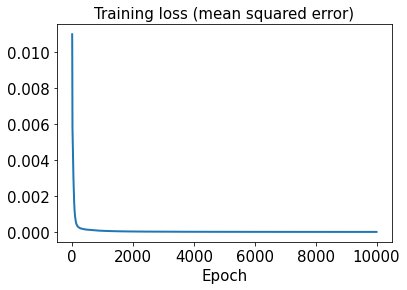

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

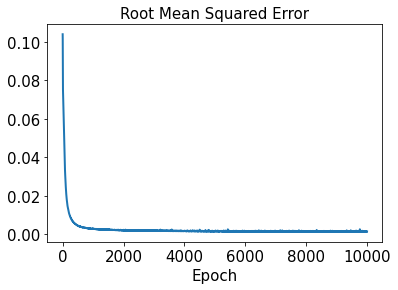

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.8692e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0005131725


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.008973807


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00032627187, 0.00046249788, 0.0002787, 0.0004990203, 0.00035151414, 0.0004427838, 0.00036036852, 0.0006753815, 0.00037059298, 0.00069906894, 0.0010832729, 0.001322932, 0.00016155244, 0.00040318296, 0.00095428445, 0.00084054726, 0.0013346238, 0.00035365662, 0.00048467124, 0.00014545179, 0.00016131726, 0.0002804781, 0.00043714786, 0.0021247987, 0.0005742167, 0.0005282246, 0.0009451904, 0.00041195258, 0.0011147304, 0.0006408667, 0.0004566694, 0.00038060202, 0.00028604665, 0.00066772825, 0.0007391134, 0.0003511901, 0.00038894403, 0.00080243533, 0.00015639696, 0.0012032824, 0.00050366373, 0.0006092098, 0.0005697707, 0.0018652233, 0.00042520027, 0.0005472358, 0.0005705245, 0.00038125337, 0.00015138055, 0.00026689086, 0.00035000223, 0.0009115581, 0.00026583136, 0.00020970449, 0.00026939917, 0.00019504012, 0.00051813637, 0.0007003335, 0.00075617543, 0.00044816468, 0.00023911324, 0.00014339204, 0.00016025497, 0.000701266, 0.00021047822, 0.00080975966, 0.00030021623, 0.0007040533, 0.000721622

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.011573748, 0.0014945447, 0.00044856276, 0.00036703833, 0.001004585, 0.024461458, 0.022946646, 0.0007738378, 0.0009790104, 0.0005395414, 0.11468384, 0.0017881506, 0.0007241931, 0.00053583086, 0.00090549653, 0.0016385149, 0.00069726893, 0.0018079404, 0.11691783, 0.0012100274, 0.0013615388, 0.0007616416, 0.0007289104, 0.0010218135, 0.0008042083, 0.00095809984, 0.0009925101, 0.004118102, 0.00052076136, 0.0026882195, 0.0011655722, 0.0072281756, 0.00077392015, 0.00035253304, 0.0009363163, 0.013482193, 0.00076006196, 0.00094590546, 0.01092324, 0.0017906635, 0.0017990954, 0.0015163246, 0.0008628827, 0.0015643301]


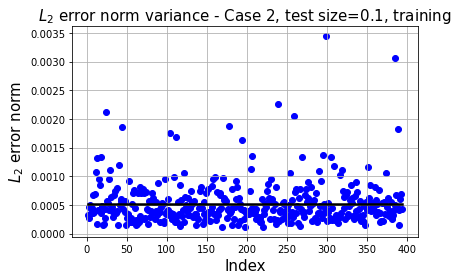

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

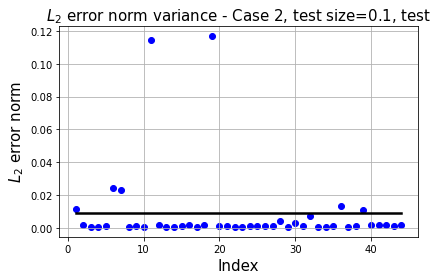

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

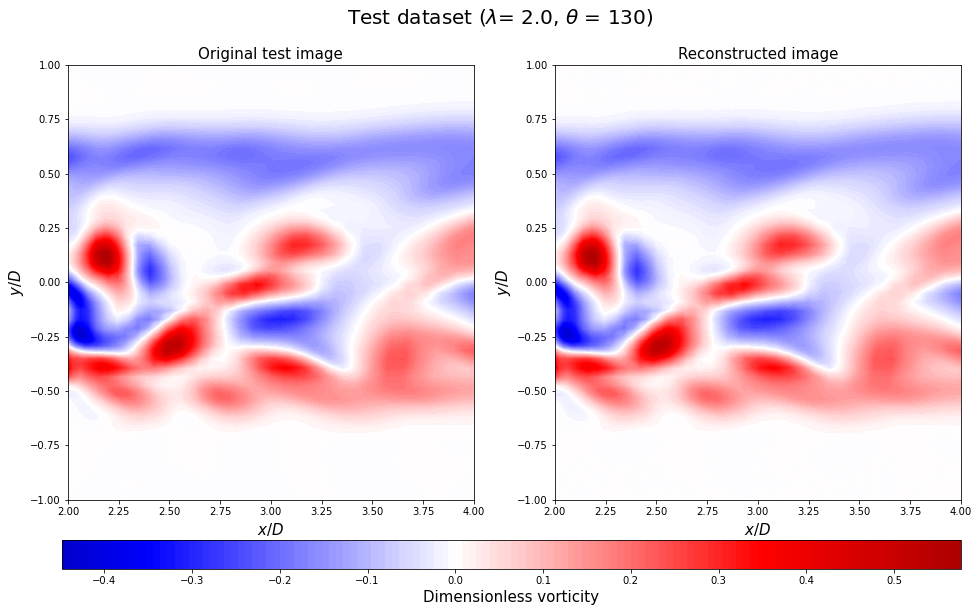

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

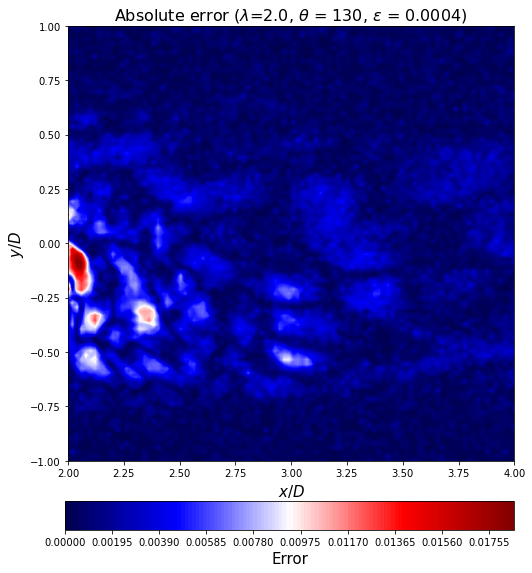

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()